# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

In [1]:
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline
import seaborn as sns
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [2]:
from matplotlib.pyplot import figure, show  #To set the figure size
import matplotlib.pyplot as plt
sns.set(style='darkgrid', context='notebook', palette='deep', # Here you can set up the style of your graphs, this is my prefered one.
        font_scale=1.3) # This last parameter is important control the font size
import warnings # To avoid warnings
warnings.filterwarnings('ignore')

## QUESTIONS
wich user are the best
Gastamos ofertas en cosas que no se utilizan
cuanles son los más beneficiosos

## DATA UNDERSTANDING
Check every datasets: 
 - understand every column
 - look outliers, nans...
 - the relationship in the dataset

### 1. portfolio
Check dataset of portfolio, define the discount

In [3]:
portfolio.head(2)

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10


#### 1.1 Channels
List of strings with the channel that the offert distribute

In [4]:
# list of channel on every string
list_channels = portfolio['channels'].values
list_channels

array([['email', 'mobile', 'social'], ['web', 'email', 'mobile', 'social'],
       ['web', 'email', 'mobile'], ['web', 'email', 'mobile'],
       ['web', 'email'], ['web', 'email', 'mobile', 'social'],
       ['web', 'email', 'mobile', 'social'], ['email', 'mobile', 'social'],
       ['web', 'email', 'mobile', 'social'], ['web', 'email', 'mobile']], dtype=object)

In [5]:
# create a column for every channel 
portfolio.drop('channels', 1).join(pd.get_dummies(
        pd.DataFrame(portfolio.channels.tolist()).stack()).sum(level=0))


,difficulty,duration,id,offer_type,reward,email,mobile,social,web
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,0,0,1
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1
7,0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,1,1,1,0
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1
9,10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,0,1


####  1.2 Difficulty
Difficulty (int) - minimum required spend to complete an offer

In [6]:
# check the distribution of this difficulty
print( portfolio['difficulty'].value_counts(dropna=False))
portfolio['difficulty'].describe()

10    4
5     2
0     2
7     1
20    1
Name: difficulty, dtype: int64


count    10.000000
mean      7.700000
std       5.831905
min       0.000000
25%       5.000000
50%       8.500000
75%      10.000000
max      20.000000
Name: difficulty, dtype: float64

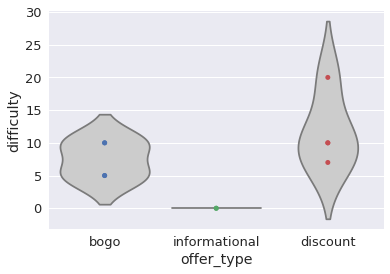

In [7]:
ax = sns.violinplot(x="offer_type", y="difficulty", data=portfolio,
                    inner=None, color=".8")
ax = sns.stripplot(x="offer_type", y="difficulty", data=portfolio)

####  1.3 Reward
reward (int) - reward given for completing an offer

In [8]:
print(portfolio['reward'].value_counts(dropna=False))
portfolio['reward'].describe()

5     3
10    2
2     2
0     2
3     1
Name: reward, dtype: int64


count    10.000000
mean      4.200000
std       3.583915
min       0.000000
25%       2.000000
50%       4.000000
75%       5.000000
max      10.000000
Name: reward, dtype: float64

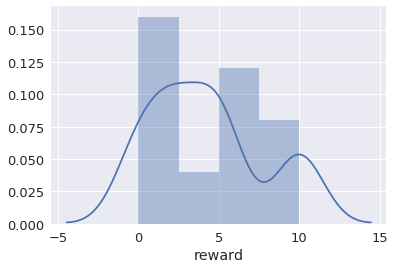

In [9]:
sns.distplot(portfolio['reward'])

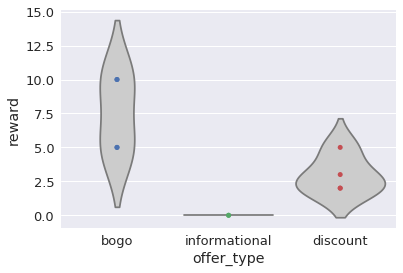

In [10]:
ax = sns.violinplot(x="offer_type", y="reward", data=portfolio,
                    inner=None, color=".8")
ax = sns.stripplot(x="offer_type", y="reward", data=portfolio)

In [11]:
# I create the reward_net: reward - difficulty 
portfolio['reward_net'] = portfolio['reward'] - portfolio['difficulty']

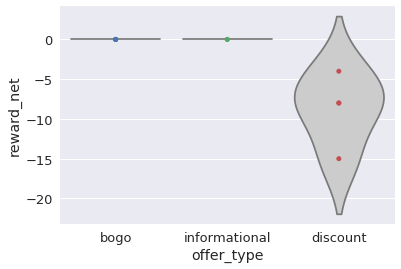

In [12]:
ax = sns.violinplot(x="offer_type", y="reward_net", data=portfolio,
                    inner=None, color=".8")
ax = sns.stripplot(x="offer_type", y="reward_net", data=portfolio)

In [13]:
portfolio.head(2)

,channels,difficulty,duration,id,offer_type,reward,reward_net
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,0
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,0


### Duration
duration (int) - time for offer to be open, in days

In [14]:
print(portfolio['duration'].value_counts(dropna=False))
portfolio['duration'].describe()

7     4
10    2
5     2
4     1
3     1
Name: duration, dtype: int64


count    10.000000
mean      6.500000
std       2.321398
min       3.000000
25%       5.000000
50%       7.000000
75%       7.000000
max      10.000000
Name: duration, dtype: float64

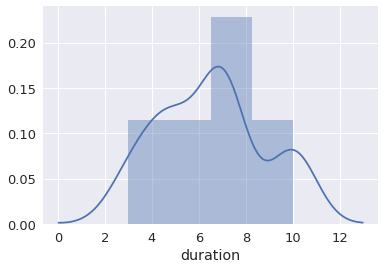

In [15]:
sns.distplot(portfolio['duration'] )

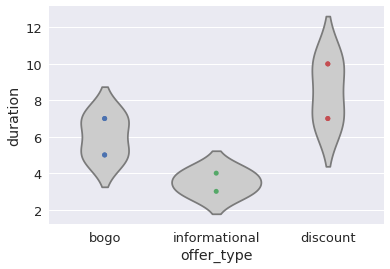

In [16]:
ax = sns.violinplot(x="offer_type", y="duration", data=portfolio,
                    inner=None, color=".8")
ax = sns.stripplot(x="offer_type", y="duration", data=portfolio)

In [17]:
'''I have included a prefix in the column name 
to remind you which dataset this information comes from'''

portfolio = portfolio.add_prefix('off_')
portfolio.head()

,off_channels,off_difficulty,off_duration,off_id,off_offer_type,off_reward,off_reward_net
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,0
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,0
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,0
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,-15


Conclusions:
**The discount has more difficulty and less reward . But more time to use it.**

## 2.profile.json
Dataset with all the data of the user

In [18]:
print(profile.shape)
profile.head(2)

(17000, 5)


,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0


## Age
age (int) - age of the customer

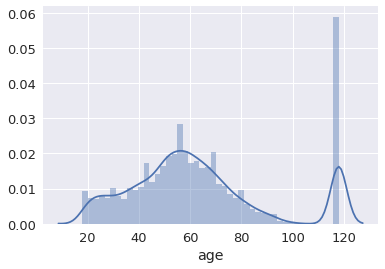

In [19]:
sns.distplot(profile['age'])

In [20]:
profile['age'].isnull().sum()

0

In [21]:
# strange people with 118 years
print(profile[profile['age']>100].shape)
profile[profile['age']>100].head(3)

(2180, 5)


,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [22]:
pd.cut(profile['age'], bins=np.linspace(0, 118, 9)).value_counts()

(44.25, 59.0]      4825
(59.0, 73.75]      3873
(29.5, 44.25]      2551
(103.25, 118.0]    2175
(73.75, 88.5]      1678
(14.75, 29.5]      1574
(88.5, 103.25]      324
(0.0, 14.75]          0
Name: age, dtype: int64

In [23]:
# 118 years , replace with NAN, and input nan with mean 

profile['age'].replace(118,np.NaN, inplace=True)
profile['age'] = profile['age'].fillna(profile['age'].median())

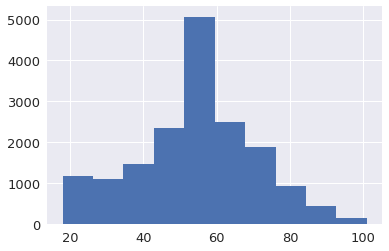

In [24]:
profile['age'].hist()

In [25]:
# create ranges
pd.cut(profile['age'], bins=np.linspace(0, 100,6)).value_counts()

(40.0, 60.0]     8156
(60.0, 80.0]     4556
(20.0, 40.0]     2962
(80.0, 100.0]     981
(0.0, 20.0]       340
Name: age, dtype: int64

In [26]:
labels = ['young_20s', 'adult_40s','Midadult_60s','Midold_80s' ,'Old_100s']
cut_bins = [0, 20, 40, 60,80,100]
profile['age_range']= pd.cut(profile['age'], bins=cut_bins, labels=labels)

In [27]:
gd_age_range = pd.get_dummies(profile['age_range'],prefix='age_')
profile = pd.concat([profile, gd_age_range], axis=1)
profile.head(3)

,age,became_member_on,gender,id,income,age_range,age__young_20s,age__adult_40s,age__Midadult_60s,age__Midold_80s,age__Old_100s
0,55.0,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,Midadult_60s,0,0,1,0,0
1,55.0,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,Midadult_60s,0,0,1,0,0
2,55.0,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN,Midadult_60s,0,0,1,0,0


In [28]:
profile['age_range'].value_counts()

Midadult_60s    8156
Midold_80s      4556
adult_40s       2962
Old_100s         981
young_20s        340
Name: age_range, dtype: int64

In [29]:
profile.head()

,age,became_member_on,gender,id,income,age_range,age__young_20s,age__adult_40s,age__Midadult_60s,age__Midold_80s,age__Old_100s
0,55.0,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,Midadult_60s,0,0,1,0,0
1,55.0,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,Midadult_60s,0,0,1,0,0
2,55.0,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN,Midadult_60s,0,0,1,0,0
3,75.0,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,Midold_80s,0,0,0,1,0
4,55.0,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN,Midadult_60s,0,0,1,0,0


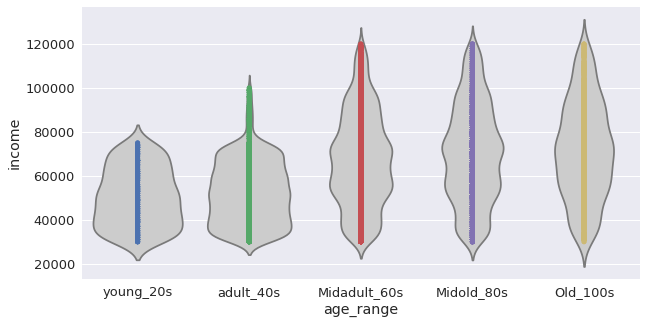

In [30]:
plt.figure(figsize=(10,5))
ax = sns.violinplot(x="age_range", y="income", data=profile,
                    inner=None, color=".8")
ax = sns.stripplot(x="age_range", y="income", data=profile)

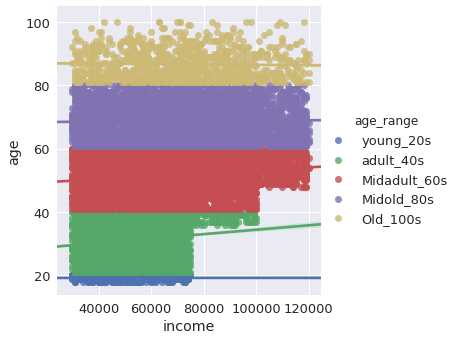

In [31]:
sns.lmplot(x="income", y="age", hue='age_range', data=profile)
plt.show()

In [32]:
profile['age'].corr(profile['income'])

0.3067027885612551

Salary has a slight positive relationship: the older you are, the more you earn.
From 60 onwards the salary is less concentrated.


In [33]:
x= profile.groupby(['age_range'])['income'].agg(['mean']).reset_index()
x


,age_range,mean
0,young_20s,50458.823529
1,adult_40s,52975.692100
2,Midadult_60s,67596.890152
3,Midold_80s,70342.405619
4,Old_100s,71807.339450


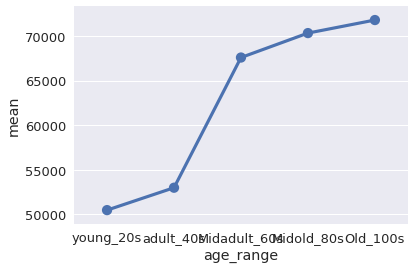

In [34]:
sns.pointplot(x['age_range'],x['mean'])

## Became member
became_member_on (int) - date when customer created an app account



In [35]:
profile['became_member_on'].isnull().sum()

0

In [36]:
profile.head()

,age,became_member_on,gender,id,income,age_range,age__young_20s,age__adult_40s,age__Midadult_60s,age__Midold_80s,age__Old_100s
0,55.0,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,Midadult_60s,0,0,1,0,0
1,55.0,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,Midadult_60s,0,0,1,0,0
2,55.0,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN,Midadult_60s,0,0,1,0,0
3,75.0,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,Midold_80s,0,0,0,1,0
4,55.0,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN,Midadult_60s,0,0,1,0,0


In [37]:
profile['became_member_on'] =pd.to_datetime(profile['became_member_on'], format='%Y%m%d', errors='ignore')

In [38]:
profile['member_year'] = profile['became_member_on'].dt.year
profile['member_month'] = profile['became_member_on'].dt.month

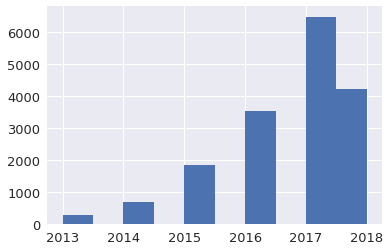

In [39]:
profile['member_year'].hist()

In [40]:
gb_menbership = profile.groupby(['member_year','member_month'], as_index=False).agg({'id':'nunique'})
gb_menbership.head()

,member_year,member_month,id
0,2013,7,5
1,2013,8,68
2,2013,9,57
3,2013,10,56
4,2013,11,48


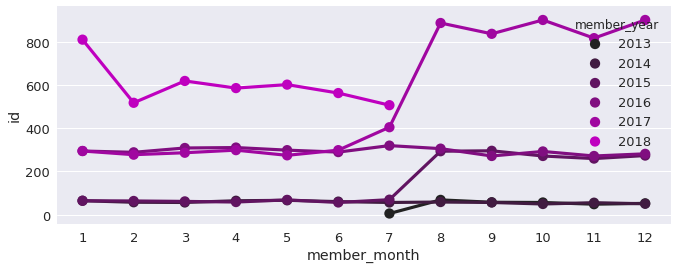

In [41]:
# In the years 2015 and 2017 in July there is an increase in subscriptions 

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11, 4)


g = sns.pointplot(x='member_month', y='id',hue='member_year',
                  color="m", data= gb_menbership)

In [42]:
profile.head()

,age,became_member_on,gender,id,income,age_range,age__young_20s,age__adult_40s,age__Midadult_60s,age__Midold_80s,age__Old_100s,member_year,member_month
0,55.0,2017-02-12,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,Midadult_60s,0,0,1,0,0,2017,2
1,55.0,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,Midadult_60s,0,0,1,0,0,2017,7
2,55.0,2018-07-12,None,38fe809add3b4fcf9315a9694bb96ff5,NaN,Midadult_60s,0,0,1,0,0,2018,7
3,75.0,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,Midold_80s,0,0,0,1,0,2017,5
4,55.0,2017-08-04,None,a03223e636434f42ac4c3df47e8bac43,NaN,Midadult_60s,0,0,1,0,0,2017,8


In [43]:
# Is interesting time in programa

x = profile['became_member_on']- profile['became_member_on'].max()
x[0:4]

0   -529 days
1   -376 days
2    -14 days
3   -443 days
Name: became_member_on, dtype: timedelta64[ns]

In [44]:
pd.qcut(profile['became_member_on']- profile['became_member_on'].max(),q=4).value_counts()

(-791 days +00:00:00, -358 days +00:00:00]            4279
(-1824 days +23:59:59.999999, -791 days +00:00:00]    4252
(-358 days +00:00:00, -208 days +00:00:00]            4246
(-208 days +00:00:00, 0 days 00:00:00]                4223
Name: became_member_on, dtype: int64

In [45]:
profile['became_member_on'].max()

Timestamp('2018-07-26 00:00:00')

In [46]:
bin_labels = ['former', '2years', '1year', 'New']
profile['veteranship']= pd.qcut(profile['became_member_on']- profile['became_member_on'].max(), q=4,labels=bin_labels)

In [47]:
profile['veteranship'].value_counts()

2years    4279
former    4252
1year     4246
New       4223
Name: veteranship, dtype: int64

In [48]:
gd_veteranship = pd.get_dummies(profile['veteranship'],prefix='vet_')
profile = pd.concat([profile, gd_veteranship], axis=1)
profile.head(3)

,age,became_member_on,gender,id,income,age_range,age__young_20s,age__adult_40s,age__Midadult_60s,age__Midold_80s,age__Old_100s,member_year,member_month,veteranship,vet__former,vet__2years,vet__1year,vet__New
0,55.0,2017-02-12,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,Midadult_60s,0,0,1,0,0,2017,2,2years,0,1,0,0
1,55.0,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,Midadult_60s,0,0,1,0,0,2017,7,2years,0,1,0,0
2,55.0,2018-07-12,None,38fe809add3b4fcf9315a9694bb96ff5,NaN,Midadult_60s,0,0,1,0,0,2018,7,New,0,0,0,1


In [49]:
profile.head()

,age,became_member_on,gender,id,income,age_range,age__young_20s,age__adult_40s,age__Midadult_60s,age__Midold_80s,age__Old_100s,member_year,member_month,veteranship,vet__former,vet__2years,vet__1year,vet__New
0,55.0,2017-02-12,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,Midadult_60s,0,0,1,0,0,2017,2,2years,0,1,0,0
1,55.0,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,Midadult_60s,0,0,1,0,0,2017,7,2years,0,1,0,0
2,55.0,2018-07-12,None,38fe809add3b4fcf9315a9694bb96ff5,NaN,Midadult_60s,0,0,1,0,0,2018,7,New,0,0,0,1
3,75.0,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,Midold_80s,0,0,0,1,0,2017,5,2years,0,1,0,0
4,55.0,2017-08-04,None,a03223e636434f42ac4c3df47e8bac43,NaN,Midadult_60s,0,0,1,0,0,2017,8,1year,0,0,1,0


In [50]:
x= profile.groupby(['veteranship'])['income'].agg(['mean']).reset_index()
x


,veteranship,mean
0,former,65985.619174
1,2years,69676.366603
2,1year,64065.152744
3,New,61904.710341


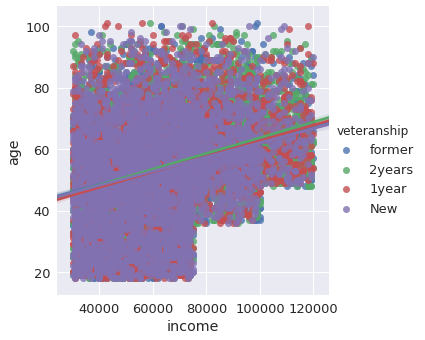

In [51]:
sns.lmplot(x="income", y="age", hue='veteranship', data=profile)
plt.show()

# Gender
gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)


In [52]:
print(profile['gender'].value_counts(dropna=False))
profile['gender'].describe()

M      8484
F      6129
NaN    2175
O       212
Name: gender, dtype: int64


count     14825
unique        3
top           M
freq       8484
Name: gender, dtype: object

In [53]:
# fill na with mode,
profile['gender'] = profile['gender'].fillna(profile['gender'].mode()[0])

In [54]:
print(profile['gender'].value_counts(dropna=False))

M    10659
F     6129
O      212
Name: gender, dtype: int64


In [55]:
profile.head(2)

,age,became_member_on,gender,id,income,age_range,age__young_20s,age__adult_40s,age__Midadult_60s,age__Midold_80s,age__Old_100s,member_year,member_month,veteranship,vet__former,vet__2years,vet__1year,vet__New
0,55.0,2017-02-12,M,68be06ca386d4c31939f3a4f0e3dd783,NaN,Midadult_60s,0,0,1,0,0,2017,2,2years,0,1,0,0
1,55.0,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,Midadult_60s,0,0,1,0,0,2017,7,2years,0,1,0,0


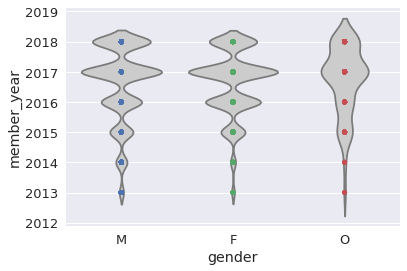

In [56]:
ax = sns.violinplot(x="gender", y="member_year", data=profile,
                    inner=None, color=".8")
ax = sns.stripplot(x="gender", y="member_year", data=profile)

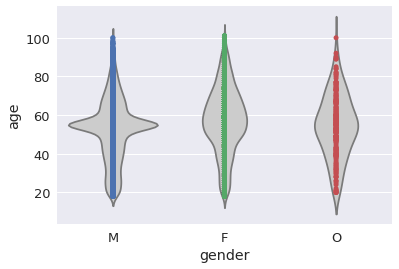

In [57]:
# very interesting on 50´s 

ax = sns.violinplot(x="gender", y="age", data=profile,
                    inner=None, color=".8")
ax = sns.stripplot(x="gender", y="age", data=profile)

In [58]:
x= profile.groupby(['gender'])['income'].agg(['mean']).reset_index()
x


,gender,mean
0,F,71306.412139
1,M,61194.601603
2,O,63287.735849


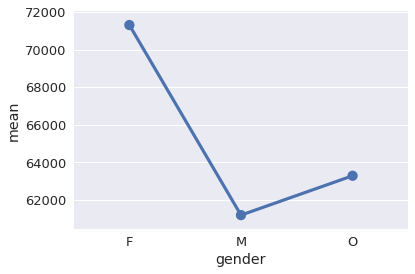

In [59]:
sns.pointplot(x['gender'],x['mean'])

# Income
income (float) - customer's income

In [60]:
profile['income'].isnull().sum()

2175

In [61]:
profile['income']=profile['income'].fillna(profile['income'].median())

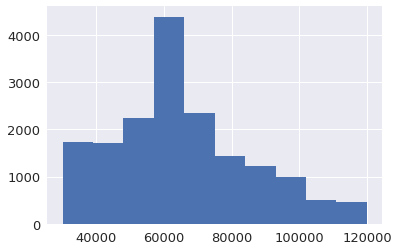

In [62]:
profile['income'].hist()

In [63]:
# create a bins
pd.qcut(profile['income'], q=4).value_counts()
#profile['income_range']= pd.qcut(profile['income'], q=4)

(51000.0, 64000.0]      5517
(29999.999, 51000.0]    4302
(76000.0, 120000.0]     4198
(64000.0, 76000.0]      2983
Name: income, dtype: int64

In [64]:
# relation positive with age 
bin_labels = ['inc_30_50k', 'inc_50_64K', 'inc_64_80K', 'inc_80_120K']

profile['income_range']= pd.qcut(profile['income'], q=4,labels=bin_labels)

In [65]:
profile.head()

,age,became_member_on,gender,id,income,age_range,age__young_20s,age__adult_40s,age__Midadult_60s,age__Midold_80s,age__Old_100s,member_year,member_month,veteranship,vet__former,vet__2years,vet__1year,vet__New,income_range
0,55.0,2017-02-12,M,68be06ca386d4c31939f3a4f0e3dd783,64000.0,Midadult_60s,0,0,1,0,0,2017,2,2years,0,1,0,0,inc_50_64K
1,55.0,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,Midadult_60s,0,0,1,0,0,2017,7,2years,0,1,0,0,inc_80_120K
2,55.0,2018-07-12,M,38fe809add3b4fcf9315a9694bb96ff5,64000.0,Midadult_60s,0,0,1,0,0,2018,7,New,0,0,0,1,inc_50_64K
3,75.0,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,Midold_80s,0,0,0,1,0,2017,5,2years,0,1,0,0,inc_80_120K
4,55.0,2017-08-04,M,a03223e636434f42ac4c3df47e8bac43,64000.0,Midadult_60s,0,0,1,0,0,2017,8,1year,0,0,1,0,inc_50_64K


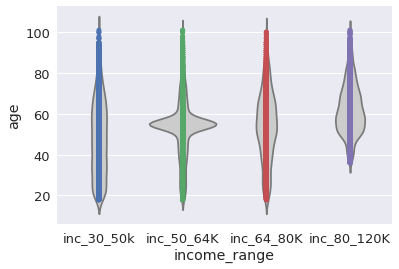

In [66]:
ax = sns.violinplot(x="income_range", y="age", data=profile,
                    inner=None, color=".8")
ax = sns.stripplot(x="income_range", y="age", data=profile)

In [67]:
#profile.rename(columns={'id':'customer_id'}, inplace=True)

In [68]:
profile = profile.add_prefix('cust_')
profile.head()

,cust_age,cust_became_member_on,cust_gender,cust_id,cust_income,cust_age_range,cust_age__young_20s,cust_age__adult_40s,cust_age__Midadult_60s,cust_age__Midold_80s,cust_age__Old_100s,cust_member_year,cust_member_month,cust_veteranship,cust_vet__former,cust_vet__2years,cust_vet__1year,cust_vet__New,cust_income_range
0,55.0,2017-02-12,M,68be06ca386d4c31939f3a4f0e3dd783,64000.0,Midadult_60s,0,0,1,0,0,2017,2,2years,0,1,0,0,inc_50_64K
1,55.0,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,Midadult_60s,0,0,1,0,0,2017,7,2years,0,1,0,0,inc_80_120K
2,55.0,2018-07-12,M,38fe809add3b4fcf9315a9694bb96ff5,64000.0,Midadult_60s,0,0,1,0,0,2018,7,New,0,0,0,1,inc_50_64K
3,75.0,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,Midold_80s,0,0,0,1,0,2017,5,2years,0,1,0,0,inc_80_120K
4,55.0,2017-08-04,M,a03223e636434f42ac4c3df47e8bac43,64000.0,Midadult_60s,0,0,1,0,0,2017,8,1year,0,0,1,0,inc_50_64K


Conclusion:
**
- The older you get, the more you earn
- Women have more income
- In July, both in 2015 and 2017, subscriptions increased **
- Users who started in the program have a higher average salary
- In the months of July and August there is always an increase in users, some years this increase is greater. This is when the program started

## transcrip 

In [69]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [70]:
transcript.dtypes

event     object
person    object
time       int64
value     object
dtype: object

In [71]:
print(len(transcript['time'].value_counts()))
transcript['time'].value_counts()[:5]


120


408    17030
576    17015
504    16822
336    16302
168    16150
Name: time, dtype: int64

In [72]:
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [73]:
33579/76277

0.4402244451145168

In [74]:
transcript['person'].nunique()

17000

In [75]:
# how to work with column value
#https://stackoverflow.com/questions/53910073/extract-values-belonging-to-a-specific-key-from-a-column-of-json-in-pandas
#https://stackoverflow.com/questions/56421683/how-to-apply-a-function-for-each-row-of-a-dataframe-which-checks-keys-of-embedd
#transcript['value'].apply(lambda x: list(x.keys())[0])

transcript.value.apply(lambda x : list(x.keys())[0])[0:5]

0    offer id
1    offer id
2    offer id
3    offer id
4    offer id
Name: value, dtype: object

In [76]:
transcript.value.apply(lambda x : list(x.keys()))[0:5]

0    [offer id]
1    [offer id]
2    [offer id]
3    [offer id]
4    [offer id]
Name: value, dtype: object

In [77]:
transcript.value.apply(lambda x : list(x.keys())[0]).value_counts()

amount      138953
offer id    134002
offer_id     33579
Name: value, dtype: int64

In [78]:
transcript.value.apply(lambda x : list(x.values())[0])[0:5]

0    9b98b8c7a33c4b65b9aebfe6a799e6d9
1    0b1e1539f2cc45b7b9fa7c272da2e1d7
2    2906b810c7d4411798c6938adc9daaa5
3    fafdcd668e3743c1bb461111dcafc2a4
4    4d5c57ea9a6940dd891ad53e9dbe8da0
Name: value, dtype: object

In [79]:
transcript['values'] = transcript.value.apply(lambda x : list(x.values())[0])

In [80]:
#transcript['values_key'] = transcript.value.apply(lambda x : list(x.keys())[0])

In [81]:
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [82]:
transcript = pd.get_dummies(transcript , columns=['event'] , prefix='' ,prefix_sep='')

In [83]:
transcript.head()

,person,time,value,values,offer completed,offer received,offer viewed,transaction
0,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0,0
2,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,0,1,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},fafdcd668e3743c1bb461111dcafc2a4,0,1,0,0
4,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},4d5c57ea9a6940dd891ad53e9dbe8da0,0,1,0,0


In [84]:
#transcript['values_key'] = transcript['values_key'].str.replace(' ','_')

In [85]:
#transcript['values_key'].value_counts()

## Conversion 

In [86]:
conditions = [transcript['transaction']==1, transcript['transaction']!=1]
values = (transcript['values'], 0)
transcript['amount'] = np.select(conditions, values)
transcript.head()

,person,time,value,values,offer completed,offer received,offer viewed,transaction,amount
0,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,0,0
1,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0,0,0
2,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,0,1,0,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},fafdcd668e3743c1bb461111dcafc2a4,0,1,0,0,0
4,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},4d5c57ea9a6940dd891ad53e9dbe8da0,0,1,0,0,0


In [87]:
transcript[transcript['transaction']==1].head()

,person,time,value,values,offer completed,offer received,offer viewed,transaction,amount
12654,02c083884c7d45b39cc68e1314fec56c,0,{'amount': 0.8300000000000001},0.83,0,0,0,1,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0,{'amount': 34.56},34.56,0,0,0,1,34.56
12659,54890f68699049c2a04d415abc25e717,0,{'amount': 13.23},13.23,0,0,0,1,13.23
12670,b2f1cd155b864803ad8334cdf13c4bd2,0,{'amount': 19.51},19.51,0,0,0,1,19.51
12671,fe97aa22dd3e48c8b143116a8403dd52,0,{'amount': 18.97},18.97,0,0,0,1,18.97


In [88]:
print(transcript[transcript['transaction']!=1]['amount'].value_counts())
transcript['amount'].isnull().sum()

0    167581
Name: amount, dtype: int64


0

In [89]:
transcript[transcript['transaction']==1]['amount'].describe()

count     138953.00
unique      5103.00
top            0.05
freq         431.00
Name: amount, dtype: float64

In [90]:
transcript[transcript['transaction']==1]['amount'].mean()

12.77735615639814

In [91]:
transcript['time'] = transcript['time']/24.0

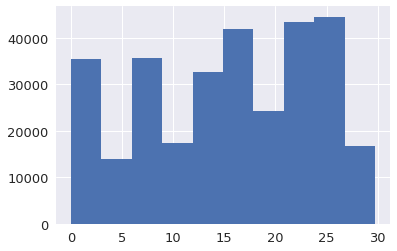

In [92]:
transcript['time'].hist()

In [93]:
# rename colums
transcript =transcript.rename(columns={"person": "cust_id", "values": "off_id"})
transcript.head(3)

,cust_id,time,value,off_id,offer completed,offer received,offer viewed,transaction,amount
0,78afa995795e4d85b5d9ceeca43f5fef,0.0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,0,0
1,a03223e636434f42ac4c3df47e8bac43,0.0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0,0,0
2,e2127556f4f64592b11af22de27a7932,0.0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,0,1,0,0,0


In [94]:
#transcript['offer_id'].replace(1, np.nan)
transcript.head(3)

,cust_id,time,value,off_id,offer completed,offer received,offer viewed,transaction,amount
0,78afa995795e4d85b5d9ceeca43f5fef,0.0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,0,0
1,a03223e636434f42ac4c3df47e8bac43,0.0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0,0,0
2,e2127556f4f64592b11af22de27a7932,0.0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,0,1,0,0,0


## Conversion 
per customer, offert or type of offer

In [95]:
conversion= transcript.groupby(['cust_id','off_id']).agg(
    {"offer completed":"sum",
     "offer received":"sum",
     "offer viewed":"sum"}).reset_index(col_level=1)

In [96]:
conversion.head()

,cust_id,off_id,offer completed,offer received,offer viewed
0,0009655768c64bdeb2e877511632db8f,8.57,0,0,0
1,0009655768c64bdeb2e877511632db8f,10.27,0,0,0
2,0009655768c64bdeb2e877511632db8f,12.36,0,0,0
3,0009655768c64bdeb2e877511632db8f,13.56,0,0,0
4,0009655768c64bdeb2e877511632db8f,14.11,0,0,0


In [97]:
conversion["cv_total"] = conversion["offer completed"]/conversion["offer received"]
conversion["cv_vie"] = conversion["offer viewed"]/conversion["offer received"]
conversion["cv_comp"] = conversion["offer completed"]/conversion["offer viewed"]

In [98]:
conversion["cv_vie"] = conversion["offer viewed"]/conversion["offer received"]

In [99]:
print(conversion["cv_total"].sum())
print(conversion["cv_vie"].sum())
print(conversion.shape)
conversion["cv_comp"].sum()

27875.0333333
47942.1166667
(201444, 8)


inf

In [100]:
conversion.drop(conversion[conversion['offer received']==0].index, inplace=True)
print(conversion.shape)

(63288, 8)


In [101]:
conversion.tail()

,cust_id,off_id,offer completed,offer received,offer viewed,cv_total,cv_vie,cv_comp
201424,fffad4f4828548d1b5583907f2e9906b,f19421c1d4aa40978ebb69ca19b0e20d,2,2,2,1.0,1.0,1.0
201440,ffff82501cea40309d5fdd7edcca4a07,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,1,1.0,1.0,1.0
201441,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,3,3,3,1.0,1.0,1.0
201442,ffff82501cea40309d5fdd7edcca4a07,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,1.0,1.0,1.0
201443,ffff82501cea40309d5fdd7edcca4a07,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1.0,1.0,1.0


In [102]:
conversion2 = transcript[transcript['transaction']==0]

In [103]:
conversion3= conversion2.groupby(['cust_id','off_id']).agg(
    {"off_id":["nunique","count"],
     "offer completed":["count","sum"],
     "offer received":["count","sum"],     
     "offer viewed":["count","sum"]}).reset_index(col_level=1)

In [104]:
conversion3.shape

(63288, 10)

In [105]:
transcript[(transcript['off_id']=='f19421c1d4aa40978ebb69ca19b0e20d') &
          (transcript['cust_id']=='fffad4f4828548d1b5583907f2e9906b') ]

,cust_id,time,value,off_id,offer completed,offer received,offer viewed,transaction,amount
184,fffad4f4828548d1b5583907f2e9906b,0.00,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},f19421c1d4aa40978ebb69ca19b0e20d,0,1,0,0,0
15591,fffad4f4828548d1b5583907f2e9906b,0.25,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},f19421c1d4aa40978ebb69ca19b0e20d,0,0,1,0,0
26145,fffad4f4828548d1b5583907f2e9906b,1.50,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...,f19421c1d4aa40978ebb69ca19b0e20d,1,0,0,0,0
150794,fffad4f4828548d1b5583907f2e9906b,17.00,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},f19421c1d4aa40978ebb69ca19b0e20d,0,1,0,0,0
218451,fffad4f4828548d1b5583907f2e9906b,21.25,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},f19421c1d4aa40978ebb69ca19b0e20d,0,0,1,0,0
221937,fffad4f4828548d1b5583907f2e9906b,21.50,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...,f19421c1d4aa40978ebb69ca19b0e20d,1,0,0,0,0


In [106]:
conversion3.describe()

off_id               offer completed               offer received  \
       nunique         count           count           sum          count   
count  63288.0  63288.000000    63288.000000  63288.000000   63288.000000   
mean       1.0      2.647911        2.647911      0.530575       2.647911   
std        0.0      1.307444        1.307444      0.637582       1.307444   
min        1.0      1.000000        1.000000      0.000000       1.000000   
25%        1.0      2.000000        2.000000      0.000000       2.000000   
50%        1.0      2.000000        2.000000      0.000000       2.000000   
75%        1.0      3.000000        3.000000      1.000000       3.000000   
max        1.0     13.000000       13.000000      4.000000      13.000000   

                     offer viewed               
                sum         count          sum  
count  63288.000000  63288.000000  63288.00000  
mean       1.205236      2.647911      0.91210  
std        0.453699      1.307444      0.61458  
min        1.000000      1.000000      0.00000  
25%        1.000000      2.000000      1.00000  
50%        1.000000      2.000000      1.00000  
75%        1.000000      3.000000      1.00000  
max        5.000000     13.000000      5.00000

In [107]:
conversion3.head()

off_id  \
                            cust_id                            off_id nunique   
0  0009655768c64bdeb2e877511632db8f  2906b810c7d4411798c6938adc9daaa5       1   
1  0009655768c64bdeb2e877511632db8f  3f207df678b143eea3cee63160fa8bed       1   
2  0009655768c64bdeb2e877511632db8f  5a8bc65990b245e5a138643cd4eb9837       1   
3  0009655768c64bdeb2e877511632db8f  f19421c1d4aa40978ebb69ca19b0e20d       1   
4  0009655768c64bdeb2e877511632db8f  fafdcd668e3743c1bb461111dcafc2a4       1   

        offer completed     offer received     offer viewed      
  count           count sum          count sum        count sum  
0     2               2   1              2   1            2   0  
1     2               2   0              2   1            2   1  
2     2               2   0              2   1            2   1  
3     3               3   1              3   1            3   1  
4     3               3   1              3   1            3   1

In [108]:
conversion3.columns = ['cust_id','off_id','off_nuq','off_count','off_f3_n','off_f3_sum',
                 'off_f1_n','off_f1_sum','off_f2_n','off_f2_sum']

In [109]:
conversion3["cv_total_n"] = conversion3["off_f3_n"]/conversion3["off_f1_n"]
conversion3["cv_vie_n"] = conversion3["off_f2_n"]/conversion3["off_f1_n"]
conversion3["cv_comp_n"] = conversion3["off_f3_n"]/conversion3["off_f2_n"]

In [110]:
conversion3["cv_total_sum"] = conversion3["off_f3_sum"]/conversion3["off_f1_sum"]
conversion3["cv_vie_sum"] = conversion3["off_f2_sum"]/conversion3["off_f1_sum"]
conversion3["cv_comp_sum"] = conversion3["off_f3_sum"]/conversion3["off_f2_sum"]

In [111]:
conversion3.shape

(63288, 16)

In [112]:
conversion3.describe()

,off_nuq,off_count,off_f3_n,off_f3_sum,off_f1_n,off_f1_sum,off_f2_n,off_f2_sum,cv_total_n,cv_vie_n,cv_comp_n,cv_total_sum,cv_vie_sum,cv_comp_sum
count,63288.0,63288.000000,63288.000000,63288.000000,63288.000000,63288.000000,63288.000000,63288.00000,63288.0,63288.0,63288.0,63288.000000,63288.000000,5.367100e+04
mean,1.0,2.647911,2.647911,0.530575,2.647911,1.205236,2.647911,0.91210,1.0,1.0,1.0,0.440447,0.757523,inf
std,0.0,1.307444,1.307444,0.637582,1.307444,0.453699,1.307444,0.61458,0.0,0.0,0.0,0.487589,0.417554,NaN
min,1.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.00000,1.0,1.0,1.0,0.000000,0.000000,0.000000e+00
25%,1.0,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.00000,1.0,1.0,1.0,0.000000,0.500000,0.000000e+00
50%,1.0,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.00000,1.0,1.0,1.0,0.000000,1.000000,1.000000e+00
75%,1.0,3.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.00000,1.0,1.0,1.0,1.000000,1.000000,1.000000e+00
max,1.0,13.000000,13.000000,4.000000,13.000000,5.000000,13.000000,5.00000,1.0,1.0,1.0,1.000000,1.000000,inf


In [113]:
port_conv3= conversion3.merge(portfolio,how='right',on=['off_id'], indicator=True)
print(port_conv3.shape)
port_conv3.head()

(63288, 23)


,cust_id,off_id,off_nuq,off_count,off_f3_n,off_f3_sum,off_f1_n,off_f1_sum,off_f2_n,off_f2_sum,...,cv_total_sum,cv_vie_sum,cv_comp_sum,off_channels,off_difficulty,off_duration,off_offer_type,off_reward,off_reward_net,_merge
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1,2,2,1,2,1,2,0,...,1.0,0.0,inf,"[web, email, mobile]",10,7,discount,2,-8,both
1,00426fe3ffde4c6b9cb9ad6d077a13ea,2906b810c7d4411798c6938adc9daaa5,1,2,2,0,2,2,2,0,...,0.0,0.0,NaN,"[web, email, mobile]",10,7,discount,2,-8,both
2,005500a7188546ff8a767329a2f7c76a,2906b810c7d4411798c6938adc9daaa5,1,1,1,0,1,1,1,0,...,0.0,0.0,NaN,"[web, email, mobile]",10,7,discount,2,-8,both
3,0069a50874d846438e58acff5e594725,2906b810c7d4411798c6938adc9daaa5,1,4,4,1,4,2,4,1,...,0.5,0.5,1.000000,"[web, email, mobile]",10,7,discount,2,-8,both
4,00715b6e55c3431cb56ff7307eb19675,2906b810c7d4411798c6938adc9daaa5,1,3,3,1,3,1,3,1,...,1.0,1.0,1.000000,"[web, email, mobile]",10,7,discount,2,-8,both


In [114]:
conversion4= conversion3.groupby(['cust_id']).agg(
    {"off_nuq":"sum",
     "off_count":"sum",
     "off_f1_sum":"sum",     
     "off_f2_sum":"sum","off_f3_sum":"sum" }).reset_index(col_level=1)

In [115]:
conversion4.head()

,cust_id,off_nuq,off_count,off_f1_sum,off_f2_sum,off_f3_sum
0,0009655768c64bdeb2e877511632db8f,5,12,5,4,3
1,00116118485d4dfda04fdbaba9a87b5c,1,4,2,2,0
2,0011e0d4e6b944f998e987f904e8c1e5,5,13,5,5,3
3,0020c2b971eb4e9188eac86d93036a77,4,11,5,3,3
4,0020ccbbb6d84e358d3414a3ff76cffd,4,11,4,4,3


In [116]:
conversion4["cv"] = conversion4["off_f3_sum"]/conversion4["off_f1_sum"]

In [117]:
conversion4.describe()

,off_nuq,off_count,off_f1_sum,off_f2_sum,off_f3_sum,cv
count,16994.000000,16994.000000,16994.000000,16994.000000,16994.000000,16994.000000
mean,3.724138,9.861186,4.488467,3.396787,1.975933,0.439952
std,0.989462,3.067087,1.073047,1.296312,1.605417,0.339395
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3.000000,8.000000,4.000000,3.000000,1.000000,0.166667
50%,4.000000,10.000000,5.000000,3.000000,2.000000,0.500000
75%,4.000000,12.000000,5.000000,4.000000,3.000000,0.750000
max,6.000000,18.000000,6.000000,6.000000,6.000000,1.000000


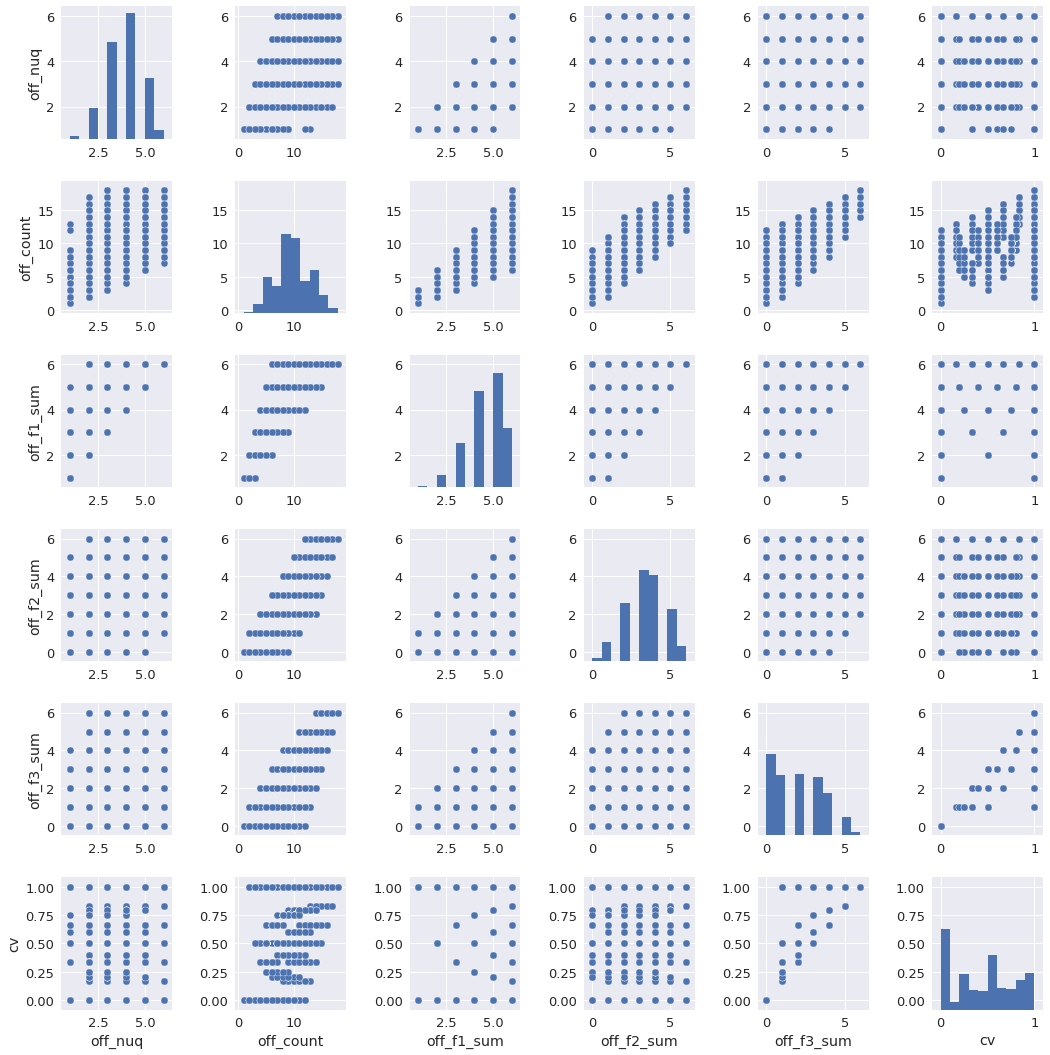

In [118]:
sns.pairplot(conversion4, size=2.5);

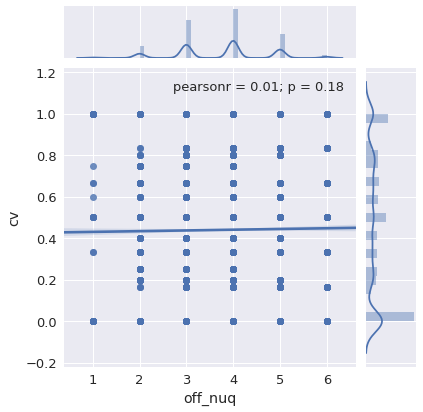

In [119]:
sns.jointplot("off_nuq", "cv", data=conversion4, kind='reg');

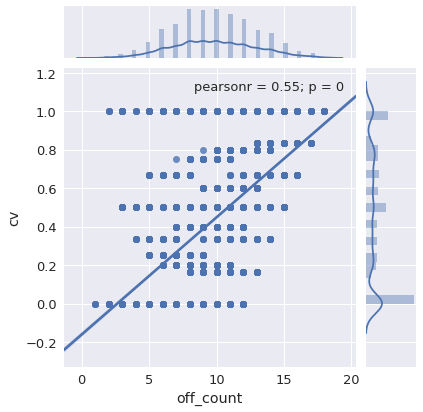

In [120]:
sns.jointplot("off_count", "cv", data=conversion4, kind='reg');

In [121]:
conversion5= port_conv3.groupby(['cust_id','off_offer_type']).agg(
    {"off_nuq":"sum",
     "off_count":"sum",
     "off_f1_sum":"sum",     
     "off_f2_sum":"sum","off_f3_sum":"sum" }).reset_index(col_level=1)

In [122]:
conversion5["cv"] = conversion5["off_f3_sum"]/conversion5["off_f1_sum"]

In [123]:
conversion5.head()

,cust_id,off_offer_type,off_nuq,off_count,off_f1_sum,off_f2_sum,off_f3_sum,cv
0,0009655768c64bdeb2e877511632db8f,bogo,1,3,1,1,1,1.0
1,0009655768c64bdeb2e877511632db8f,discount,2,5,2,1,2,1.0
2,0009655768c64bdeb2e877511632db8f,informational,2,4,2,2,0,0.0
3,00116118485d4dfda04fdbaba9a87b5c,bogo,1,4,2,2,0,0.0
4,0011e0d4e6b944f998e987f904e8c1e5,bogo,1,3,1,1,1,1.0


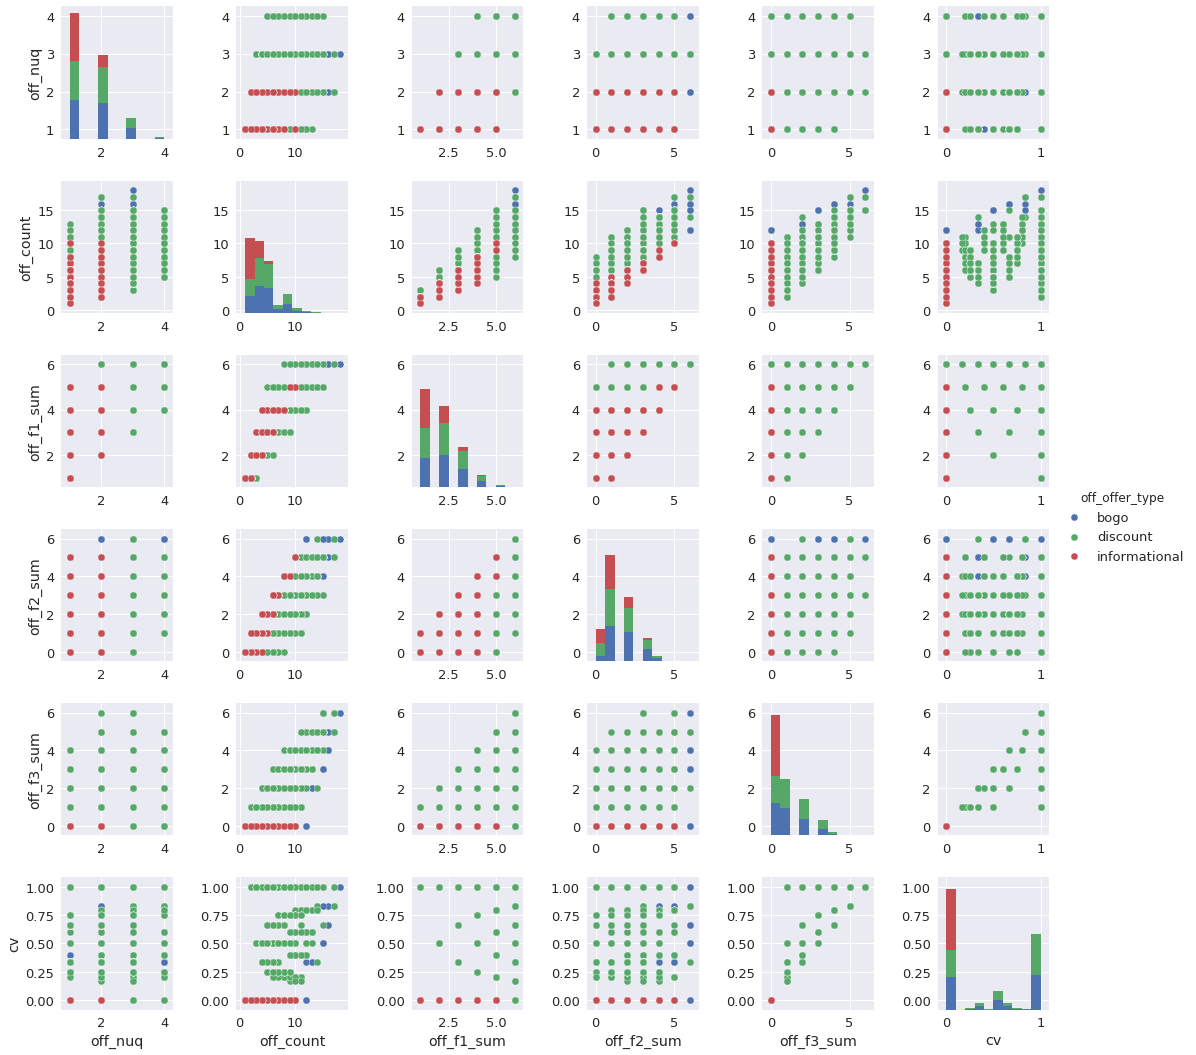

In [124]:
sns.pairplot(conversion5, hue='off_offer_type', size=2.5);

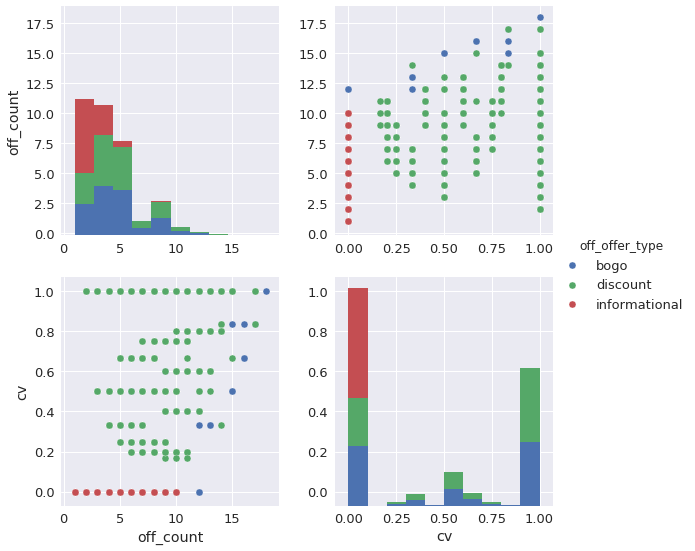

In [125]:
sns.pairplot(data = conversion5, vars = ['off_count', 'cv'], hue="off_offer_type", size=4)

# Conclusions conversions
- A user can receive the same offer at different times
- More repit offer more conversion
- the life of a offer is 30 days
- The mean transaction is 12 


# Create RFM

In [126]:
# What happend with transactions 
transactions = transcript[transcript['transaction']==1]

In [127]:
transactions.head()

,cust_id,time,value,off_id,offer completed,offer received,offer viewed,transaction,amount
12654,02c083884c7d45b39cc68e1314fec56c,0.0,{'amount': 0.8300000000000001},0.83,0,0,0,1,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0.0,{'amount': 34.56},34.56,0,0,0,1,34.56
12659,54890f68699049c2a04d415abc25e717,0.0,{'amount': 13.23},13.23,0,0,0,1,13.23
12670,b2f1cd155b864803ad8334cdf13c4bd2,0.0,{'amount': 19.51},19.51,0,0,0,1,19.51
12671,fe97aa22dd3e48c8b143116a8403dd52,0.0,{'amount': 18.97},18.97,0,0,0,1,18.97


In [128]:
transactions.dtypes

cust_id             object
time               float64
value               object
off_id              object
offer completed      uint8
offer received       uint8
offer viewed         uint8
transaction          uint8
amount              object
dtype: object

In [129]:
transactions.dtypes

cust_id             object
time               float64
value               object
off_id              object
offer completed      uint8
offer received       uint8
offer viewed         uint8
transaction          uint8
amount              object
dtype: object

In [130]:
transactions['amount'] = transactions['amount'].astype(int)

In [131]:
transactions.tail()

,cust_id,time,value,off_id,offer completed,offer received,offer viewed,transaction,amount
306529,b3a1272bc9904337b331bf348c3e8c17,29.75,{'amount': 1.5899999999999999},1.59,0,0,0,1,1
306530,68213b08d99a4ae1b0dcb72aebd9aa35,29.75,{'amount': 9.53},9.53,0,0,0,1,9
306531,a00058cf10334a308c68e7631c529907,29.75,{'amount': 3.61},3.61,0,0,0,1,3
306532,76ddbd6576844afe811f1a3c0fbb5bec,29.75,{'amount': 3.5300000000000002},3.53,0,0,0,1,3
306533,c02b10e8752c4d8e9b73f918558531f7,29.75,{'amount': 4.05},4.05,0,0,0,1,4


In [132]:
transactions.describe()

,time,offer completed,offer received,offer viewed,transaction,amount
count,138953.000000,138953.0,138953.0,138953.0,138953.0,138953.000000
mean,15.899347,0.0,0.0,0.0,1.0,12.287860
std,8.404051,0.0,0.0,0.0,0.0,30.251927
min,0.000000,0.0,0.0,0.0,1.0,0.000000
25%,8.750000,0.0,0.0,0.0,1.0,2.000000
50%,16.750000,0.0,0.0,0.0,1.0,8.000000
75%,23.000000,0.0,0.0,0.0,1.0,18.000000
max,29.750000,0.0,0.0,0.0,1.0,1062.000000


In [133]:
# Calculate elements of RFM Money spend for evey user and when (Frecuency and last time)
money= transactions.groupby(['cust_id']).agg(
    {"amount":["mean", "sum"],
     "time":["mean", "max"]}).reset_index(col_level=1)

In [134]:
money.head()

amount           time       
                            cust_id       mean  sum      mean    max
0  0009655768c64bdeb2e877511632db8f  15.625000  125  22.62500  29.00
1  00116118485d4dfda04fdbaba9a87b5c   1.000000    3  17.00000  19.75
2  0011e0d4e6b944f998e987f904e8c1e5  15.400000   77  18.80000  27.25
3  0020c2b971eb4e9188eac86d93036a77  24.125000  193  14.53125  29.50
4  0020ccbbb6d84e358d3414a3ff76cffd  12.333333  148  15.62500  28.00

In [135]:
money.columns = ['cust_id','amount_mean','amount_total',
                 'time_mean','time_max']

In [136]:
money.head()

,cust_id,amount_mean,amount_total,time_mean,time_max
0,0009655768c64bdeb2e877511632db8f,15.625000,125,22.62500,29.00
1,00116118485d4dfda04fdbaba9a87b5c,1.000000,3,17.00000,19.75
2,0011e0d4e6b944f998e987f904e8c1e5,15.400000,77,18.80000,27.25
3,0020c2b971eb4e9188eac86d93036a77,24.125000,193,14.53125,29.50
4,0020ccbbb6d84e358d3414a3ff76cffd,12.333333,148,15.62500,28.00


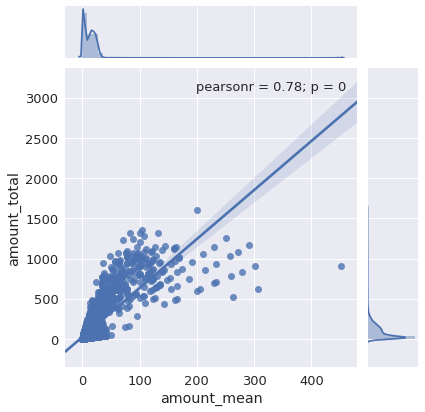

In [137]:
sns.jointplot("amount_mean", "amount_total", data=money, kind='reg');

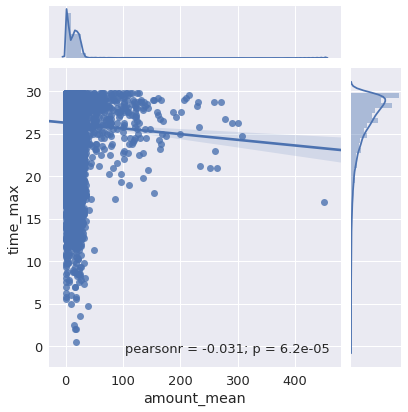

In [138]:
sns.jointplot("amount_mean", "time_max", data=money, kind='reg');

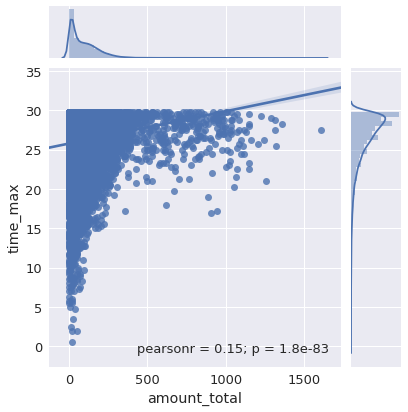

In [139]:
sns.jointplot("amount_total", "time_max", data=money, kind='reg');

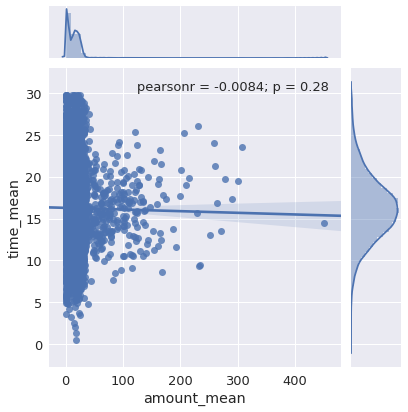

In [140]:
sns.jointplot("amount_mean", "time_mean", data=money, kind='reg');

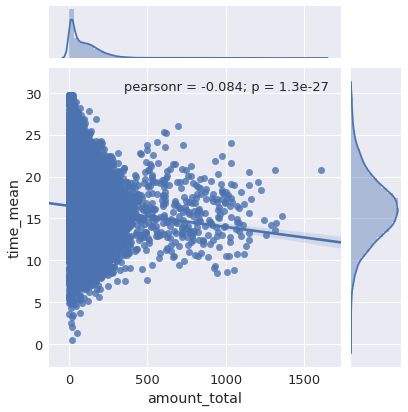

In [141]:
sns.jointplot("amount_total", "time_mean", data=money, kind='reg');

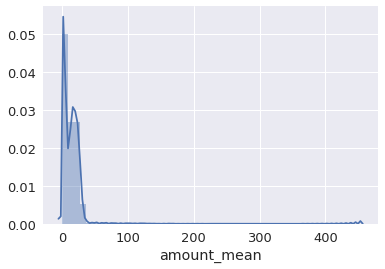

In [142]:
sns.distplot(money['amount_mean'])

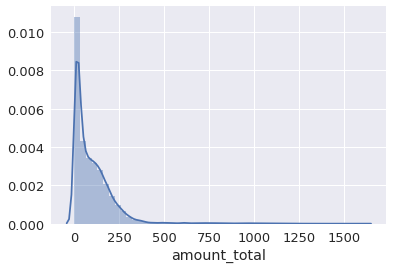

In [143]:
sns.distplot(money['amount_total'])

In [144]:
money.describe()

,amount_mean,amount_total,time_mean,time_max
count,16578.000000,16578.000000,16578.000000,16578.000000
mean,13.191702,102.994028,16.252055,26.190614
std,16.054019,125.577197,3.747965,3.448584
min,0.000000,0.000000,0.500000,0.500000
25%,2.693144,20.000000,13.807975,24.750000
50%,11.500000,69.000000,16.104167,27.250000
75%,20.000000,146.000000,18.486842,28.750000
max,451.000000,1606.000000,29.750000,29.750000


In [145]:
#money.columns =  money.columns.droplevel()

In [146]:
# we join the datasets the portfolio and transcript 
# to understand how each type of offer behaves

port_trans= transcript.merge(portfolio,how='right',on=['off_id'], indicator=True)
port_trans.head()

,cust_id,time,value,off_id,offer completed,offer received,offer viewed,transaction,amount,off_channels,off_difficulty,off_duration,off_offer_type,off_reward,off_reward_net,_merge
0,78afa995795e4d85b5d9ceeca43f5fef,0.0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,0,0,"[web, email, mobile]",5,7,bogo,5,0,both
1,ebe7ef46ea6f4963a7dd49f501b26779,0.0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,0,0,"[web, email, mobile]",5,7,bogo,5,0,both
2,f082d80f0aac47a99173ba8ef8fc1909,0.0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,0,0,"[web, email, mobile]",5,7,bogo,5,0,both
3,c0d210398dee4a0895b24444a5fcd1d2,0.0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,0,0,"[web, email, mobile]",5,7,bogo,5,0,both
4,57dd18ec5ddc46828afb81ec5977bef2,0.0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,0,0,"[web, email, mobile]",5,7,bogo,5,0,both


In [147]:
transcript['off_id'].nunique()

5113

In [148]:
portfolio['off_id'].nunique()

10

In [149]:
transcript.shape

(306534, 9)

In [150]:
port_trans.shape

(167581, 16)

In [151]:
port_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167581 entries, 0 to 167580
Data columns (total 16 columns):
cust_id            167581 non-null object
time               167581 non-null float64
value              167581 non-null object
off_id             167581 non-null object
offer completed    167581 non-null uint8
offer received     167581 non-null uint8
offer viewed       167581 non-null uint8
transaction        167581 non-null uint8
amount             167581 non-null object
off_channels       167581 non-null object
off_difficulty     167581 non-null int64
off_duration       167581 non-null int64
off_offer_type     167581 non-null object
off_reward         167581 non-null int64
off_reward_net     167581 non-null int64
_merge             167581 non-null category
dtypes: category(1), float64(1), int64(4), object(6), uint8(4)
memory usage: 16.1+ MB


In [152]:
port_trans["amount"] = port_trans['amount'].astype('int')
port_trans.dtypes

cust_id              object
time                float64
value                object
off_id               object
offer completed       uint8
offer received        uint8
offer viewed          uint8
transaction           uint8
amount                int64
off_channels         object
off_difficulty        int64
off_duration          int64
off_offer_type       object
off_reward            int64
off_reward_net        int64
_merge             category
dtype: object

In [153]:
# create a dataframe user to cluster

In [154]:
print(conversion4.shape)
conversion4.head()

(16994, 7)


,cust_id,off_nuq,off_count,off_f1_sum,off_f2_sum,off_f3_sum,cv
0,0009655768c64bdeb2e877511632db8f,5,12,5,4,3,0.60
1,00116118485d4dfda04fdbaba9a87b5c,1,4,2,2,0,0.00
2,0011e0d4e6b944f998e987f904e8c1e5,5,13,5,5,3,0.60
3,0020c2b971eb4e9188eac86d93036a77,4,11,5,3,3,0.60
4,0020ccbbb6d84e358d3414a3ff76cffd,4,11,4,4,3,0.75


In [155]:
print(money.shape)
money.head()

(16578, 5)


,cust_id,amount_mean,amount_total,time_mean,time_max
0,0009655768c64bdeb2e877511632db8f,15.625000,125,22.62500,29.00
1,00116118485d4dfda04fdbaba9a87b5c,1.000000,3,17.00000,19.75
2,0011e0d4e6b944f998e987f904e8c1e5,15.400000,77,18.80000,27.25
3,0020c2b971eb4e9188eac86d93036a77,24.125000,193,14.53125,29.50
4,0020ccbbb6d84e358d3414a3ff76cffd,12.333333,148,15.62500,28.00


In [156]:
# union for every customer RFM and conversion of offert 

money_conv= money.merge(conversion4,how='right',on=['cust_id'], indicator=True)
print(money_conv.shape)
money_conv.head()

(16994, 12)


,cust_id,amount_mean,amount_total,time_mean,time_max,off_nuq,off_count,off_f1_sum,off_f2_sum,off_f3_sum,cv,_merge
0,0009655768c64bdeb2e877511632db8f,15.625000,125.0,22.62500,29.00,5,12,5,4,3,0.60,both
1,00116118485d4dfda04fdbaba9a87b5c,1.000000,3.0,17.00000,19.75,1,4,2,2,0,0.00,both
2,0011e0d4e6b944f998e987f904e8c1e5,15.400000,77.0,18.80000,27.25,5,13,5,5,3,0.60,both
3,0020c2b971eb4e9188eac86d93036a77,24.125000,193.0,14.53125,29.50,4,11,5,3,3,0.60,both
4,0020ccbbb6d84e358d3414a3ff76cffd,12.333333,148.0,15.62500,28.00,4,11,4,4,3,0.75,both


In [157]:
money_conv["_merge"].value_counts()

both          16572
right_only      422
left_only         0
Name: _merge, dtype: int64

In [158]:
money_conv[money_conv["_merge"]=='right_only'].head()

,cust_id,amount_mean,amount_total,time_mean,time_max,off_nuq,off_count,off_f1_sum,off_f2_sum,off_f3_sum,cv,_merge
16572,01d7da27b8934ba1b3602a0153e4415f,NaN,NaN,NaN,NaN,4,9,5,4,0,0.0,right_only
16573,031387fa9cfd47e88f4e4b4b4cb71925,NaN,NaN,NaN,NaN,4,10,5,5,0,0.0,right_only
16574,043b6b6be98c412d901f7f376e0548d0,NaN,NaN,NaN,NaN,3,8,4,4,0,0.0,right_only
16575,044a7e5bbe7f4c66a898ad1dc4bc0049,NaN,NaN,NaN,NaN,4,9,5,4,0,0.0,right_only
16576,04837bcb97e241769a747cd71c50fe2f,NaN,NaN,NaN,NaN,3,7,5,2,0,0.0,right_only


In [159]:
print(conversion4.shape[0]-money.shape[0])

print('amount nan',money_conv["amount_mean"].isna().sum())
print('off_f1_sum',money_conv["off_f1_sum"].isna().sum())
len(money[money_conv["off_f1_sum"]==0])

416
amount nan 422
off_f1_sum 0


0

In [160]:
# fillna with 0 
money_conv[['amount_mean','amount_total','time_mean','time_max']].fillna(0, inplace=True)

In [161]:
money_conv.drop(['_merge'], axis=1)
money_conv.head()

,cust_id,amount_mean,amount_total,time_mean,time_max,off_nuq,off_count,off_f1_sum,off_f2_sum,off_f3_sum,cv,_merge
0,0009655768c64bdeb2e877511632db8f,15.625000,125.0,22.62500,29.00,5,12,5,4,3,0.60,both
1,00116118485d4dfda04fdbaba9a87b5c,1.000000,3.0,17.00000,19.75,1,4,2,2,0,0.00,both
2,0011e0d4e6b944f998e987f904e8c1e5,15.400000,77.0,18.80000,27.25,5,13,5,5,3,0.60,both
3,0020c2b971eb4e9188eac86d93036a77,24.125000,193.0,14.53125,29.50,4,11,5,3,3,0.60,both
4,0020ccbbb6d84e358d3414a3ff76cffd,12.333333,148.0,15.62500,28.00,4,11,4,4,3,0.75,both


In [162]:
# union money (RFM), conversion, profiles

money_conv= conversion4.merge(conversion4,how='right',on=['cust_id'])
print(money_conv.shape)
money_conv.head()

In [163]:
conversion4.shape[0]

16994

In [164]:
money_conv.isna().sum()

cust_id           0
amount_mean     422
amount_total    422
time_mean       422
time_max        422
off_nuq           0
off_count         0
off_f1_sum        0
off_f2_sum        0
off_f3_sum        0
cv                0
_merge            0
dtype: int64

In [165]:
# add profile

In [166]:
profile.head(2)

,cust_age,cust_became_member_on,cust_gender,cust_id,cust_income,cust_age_range,cust_age__young_20s,cust_age__adult_40s,cust_age__Midadult_60s,cust_age__Midold_80s,cust_age__Old_100s,cust_member_year,cust_member_month,cust_veteranship,cust_vet__former,cust_vet__2years,cust_vet__1year,cust_vet__New,cust_income_range
0,55.0,2017-02-12,M,68be06ca386d4c31939f3a4f0e3dd783,64000.0,Midadult_60s,0,0,1,0,0,2017,2,2years,0,1,0,0,inc_50_64K
1,55.0,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,Midadult_60s,0,0,1,0,0,2017,7,2years,0,1,0,0,inc_80_120K


In [167]:
profile.columns

Index(['cust_age', 'cust_became_member_on', 'cust_gender', 'cust_id',
       'cust_income', 'cust_age_range', 'cust_age__young_20s',
       'cust_age__adult_40s', 'cust_age__Midadult_60s', 'cust_age__Midold_80s',
       'cust_age__Old_100s', 'cust_member_year', 'cust_member_month',
       'cust_veteranship', 'cust_vet__former', 'cust_vet__2years',
       'cust_vet__1year', 'cust_vet__New', 'cust_income_range'],
      dtype='object')

In [168]:
profile2= profile[['cust_id','cust_gender','cust_age__young_20s',
       'cust_age__adult_40s', 'cust_age__Midadult_60s', 'cust_age__Midold_80s',
       'cust_age__Old_100s','cust_vet__former', 'cust_vet__2years',
       'cust_vet__1year', 'cust_vet__New', 'cust_income_range']]

In [169]:
gender = pd.get_dummies(profile['cust_gender'],prefix='gend_')
profile2 = pd.concat([gender, profile2], axis=1)
profile2.head(3)

,gend__F,gend__M,gend__O,cust_id,cust_gender,cust_age__young_20s,cust_age__adult_40s,cust_age__Midadult_60s,cust_age__Midold_80s,cust_age__Old_100s,cust_vet__former,cust_vet__2years,cust_vet__1year,cust_vet__New,cust_income_range
0,0,1,0,68be06ca386d4c31939f3a4f0e3dd783,M,0,0,1,0,0,0,1,0,0,inc_50_64K
1,1,0,0,0610b486422d4921ae7d2bf64640c50b,F,0,0,1,0,0,0,1,0,0,inc_80_120K
2,0,1,0,38fe809add3b4fcf9315a9694bb96ff5,M,0,0,1,0,0,0,0,0,1,inc_50_64K


In [170]:
inc = pd.get_dummies(profile['cust_income_range'],prefix='inc_')
profile2 = pd.concat([inc, profile2], axis=1)
profile2.head(3)

,inc__inc_30_50k,inc__inc_50_64K,inc__inc_64_80K,inc__inc_80_120K,gend__F,gend__M,gend__O,cust_id,cust_gender,cust_age__young_20s,cust_age__adult_40s,cust_age__Midadult_60s,cust_age__Midold_80s,cust_age__Old_100s,cust_vet__former,cust_vet__2years,cust_vet__1year,cust_vet__New,cust_income_range
0,0,1,0,0,0,1,0,68be06ca386d4c31939f3a4f0e3dd783,M,0,0,1,0,0,0,1,0,0,inc_50_64K
1,0,0,0,1,1,0,0,0610b486422d4921ae7d2bf64640c50b,F,0,0,1,0,0,0,1,0,0,inc_80_120K
2,0,1,0,0,0,1,0,38fe809add3b4fcf9315a9694bb96ff5,M,0,0,1,0,0,0,0,0,1,inc_50_64K


In [171]:
profile2.drop(columns=['cust_income_range', 'cust_gender'], inplace=True)

profile2.head()

,inc__inc_30_50k,inc__inc_50_64K,inc__inc_64_80K,inc__inc_80_120K,gend__F,gend__M,gend__O,cust_id,cust_age__young_20s,cust_age__adult_40s,cust_age__Midadult_60s,cust_age__Midold_80s,cust_age__Old_100s,cust_vet__former,cust_vet__2years,cust_vet__1year,cust_vet__New
0,0,1,0,0,0,1,0,68be06ca386d4c31939f3a4f0e3dd783,0,0,1,0,0,0,1,0,0
1,0,0,0,1,1,0,0,0610b486422d4921ae7d2bf64640c50b,0,0,1,0,0,0,1,0,0
2,0,1,0,0,0,1,0,38fe809add3b4fcf9315a9694bb96ff5,0,0,1,0,0,0,0,0,1
3,0,0,0,1,1,0,0,78afa995795e4d85b5d9ceeca43f5fef,0,0,0,1,0,0,1,0,0
4,0,1,0,0,0,1,0,a03223e636434f42ac4c3df47e8bac43,0,0,1,0,0,0,0,1,0


In [172]:
money_conv2= profile2.merge(money_conv,how='right',on=['cust_id'])
print(money_conv2.shape)
money_conv2.head()

(16994, 28)


,inc__inc_30_50k,inc__inc_50_64K,inc__inc_64_80K,inc__inc_80_120K,gend__F,gend__M,gend__O,cust_id,cust_age__young_20s,cust_age__adult_40s,...,amount_total,time_mean,time_max,off_nuq,off_count,off_f1_sum,off_f2_sum,off_f3_sum,cv,_merge
0,0,1,0,0,0,1,0,68be06ca386d4c31939f3a4f0e3dd783,0,0,...,17.0,21.972222,29.00,4,12,5,5,2,0.40,both
1,0,0,0,1,1,0,0,0610b486422d4921ae7d2bf64640c50b,0,0,...,76.0,9.583333,22.00,2,3,2,0,1,0.50,both
2,0,1,0,0,0,1,0,38fe809add3b4fcf9315a9694bb96ff5,0,0,...,12.0,19.000000,29.00,2,4,2,2,0,0.00,both
3,0,0,0,1,1,0,0,78afa995795e4d85b5d9ceeca43f5fef,0,0,...,154.0,12.857143,22.25,4,11,4,4,3,0.75,both
4,0,1,0,0,0,1,0,a03223e636434f42ac4c3df47e8bac43,0,0,...,4.0,15.416667,25.50,3,8,5,3,0,0.00,both


In [173]:
money_conv2.dtypes

inc__inc_30_50k              uint8
inc__inc_50_64K              uint8
inc__inc_64_80K              uint8
inc__inc_80_120K             uint8
gend__F                      uint8
gend__M                      uint8
gend__O                      uint8
cust_id                     object
cust_age__young_20s          uint8
cust_age__adult_40s          uint8
cust_age__Midadult_60s       uint8
cust_age__Midold_80s         uint8
cust_age__Old_100s           uint8
cust_vet__former             uint8
cust_vet__2years             uint8
cust_vet__1year              uint8
cust_vet__New                uint8
amount_mean                float64
amount_total               float64
time_mean                  float64
time_max                   float64
off_nuq                      int64
off_count                    int64
off_f1_sum                   uint8
off_f2_sum                   uint8
off_f3_sum                   uint8
cv                         float64
_merge                    category
dtype: object

In [174]:
money_conv2.set_index('cust_id', inplace = True)

In [175]:
money_conv2 =money_conv2.drop(columns=['_merge'])

In [176]:
money_conv2.isnull().sum()

inc__inc_30_50k             0
inc__inc_50_64K             0
inc__inc_64_80K             0
inc__inc_80_120K            0
gend__F                     0
gend__M                     0
gend__O                     0
cust_age__young_20s         0
cust_age__adult_40s         0
cust_age__Midadult_60s      0
cust_age__Midold_80s        0
cust_age__Old_100s          0
cust_vet__former            0
cust_vet__2years            0
cust_vet__1year             0
cust_vet__New               0
amount_mean               422
amount_total              422
time_mean                 422
time_max                  422
off_nuq                     0
off_count                   0
off_f1_sum                  0
off_f2_sum                  0
off_f3_sum                  0
cv                          0
dtype: int64

In [177]:
money_conv2[pd.isnull(money_conv2["amount_mean"])].head()

,inc__inc_30_50k,inc__inc_50_64K,inc__inc_64_80K,inc__inc_80_120K,gend__F,gend__M,gend__O,cust_age__young_20s,cust_age__adult_40s,cust_age__Midadult_60s,...,amount_mean,amount_total,time_mean,time_max,off_nuq,off_count,off_f1_sum,off_f2_sum,off_f3_sum,cv
cust_id,,,,,,,,,,,,,,,,,,,,,
8ec6ce2a7e7949b1bf142def7d0e0586,0,1,0,0,0,1,0,0,0,1,...,NaN,NaN,NaN,NaN,4,10,5,5,0,0.0
13b7b2eccf664a329d83d2a238a9a11d,0,0,1,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2,6,3,3,0,0.0
ffc6c9fbe34b4578911dcdf6745b4c74,0,1,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,3,5,3,2,0,0.0
accec36a10704e1fbaeb9b28b8bc5da8,0,0,0,1,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,5,12,6,6,0,0.0
688e4f2487d44ad8bbcc0f96936f42d6,0,0,0,1,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,3,6,4,2,0,0.0


In [178]:
money_conv2 = money_conv2.fillna(0)
money_conv2.head(2)

,inc__inc_30_50k,inc__inc_50_64K,inc__inc_64_80K,inc__inc_80_120K,gend__F,gend__M,gend__O,cust_age__young_20s,cust_age__adult_40s,cust_age__Midadult_60s,...,amount_mean,amount_total,time_mean,time_max,off_nuq,off_count,off_f1_sum,off_f2_sum,off_f3_sum,cv
cust_id,,,,,,,,,,,,,,,,,,,,,
68be06ca386d4c31939f3a4f0e3dd783,0,1,0,0,0,1,0,0,0,1,...,1.888889,17.0,21.972222,29.0,4,12,5,5,2,0.4
0610b486422d4921ae7d2bf64640c50b,0,0,0,1,1,0,0,0,0,1,...,25.333333,76.0,9.583333,22.0,2,3,2,0,1,0.5


In [179]:
money_conv2.head(2)

,inc__inc_30_50k,inc__inc_50_64K,inc__inc_64_80K,inc__inc_80_120K,gend__F,gend__M,gend__O,cust_age__young_20s,cust_age__adult_40s,cust_age__Midadult_60s,...,amount_mean,amount_total,time_mean,time_max,off_nuq,off_count,off_f1_sum,off_f2_sum,off_f3_sum,cv
cust_id,,,,,,,,,,,,,,,,,,,,,
68be06ca386d4c31939f3a4f0e3dd783,0,1,0,0,0,1,0,0,0,1,...,1.888889,17.0,21.972222,29.0,4,12,5,5,2,0.4
0610b486422d4921ae7d2bf64640c50b,0,0,0,1,1,0,0,0,0,1,...,25.333333,76.0,9.583333,22.0,2,3,2,0,1,0.5


In [180]:
# Scale the data

In [181]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn import metrics

In [182]:
#scale
scaler = StandardScaler().fit(money_conv2)
money_conv2_sca = scaler.transform(money_conv2)
money_conv2_sca.std(axis=0)[:5], money_conv2_sca.mean(axis=0)[:5]

(array([ 1.,  1.,  1.,  1.,  1.]),
 array([  2.08011658e-17,   7.35880437e-17,  -6.56438799e-17,
         -1.04842057e-16,   9.06261845e-17]))

In [183]:
# calculate PCA to check importance of features
pca = PCA()
X_pca = pca.fit_transform(money_conv2_sca)

In [184]:
# number of components that explain variance

cum_expl_var_ratio = np.cumsum(pca.explained_variance_ratio_)

#choose number of components that explain ~80% of variance
components_num = len(cum_expl_var_ratio[cum_expl_var_ratio <= 0.801])
print(f"Number of Components that explain 80%: {components_num}")
pca = PCA(components_num).fit(money_conv2_sca)
starbucks_pca = pca.transform(money_conv2_sca)

Number of Components that explain 80%: 11


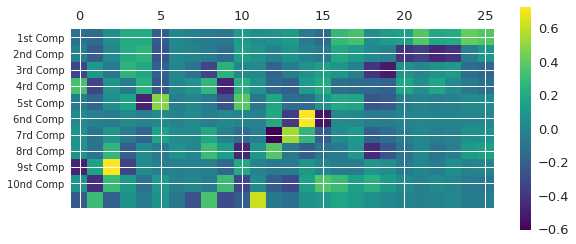

In [185]:
# check how the components has elements of every columns

plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4,5,6,7,8,9],['1st Comp','2nd Comp','3rd Comp','4rd Comp',
                      '5st Comp','6nd Comp','7rd Comp','8rd Comp',
                      '9st Comp','10nd Comp'],fontsize=10)
plt.colorbar()

plt.tight_layout()
plt.show()# 

In [186]:
len(money_conv2.columns)

26

In [187]:
money_conv2.columns

Index(['inc__inc_30_50k', 'inc__inc_50_64K', 'inc__inc_64_80K',
       'inc__inc_80_120K', 'gend__F', 'gend__M', 'gend__O',
       'cust_age__young_20s', 'cust_age__adult_40s', 'cust_age__Midadult_60s',
       'cust_age__Midold_80s', 'cust_age__Old_100s', 'cust_vet__former',
       'cust_vet__2years', 'cust_vet__1year', 'cust_vet__New', 'amount_mean',
       'amount_total', 'time_mean', 'time_max', 'off_nuq', 'off_count',
       'off_f1_sum', 'off_f2_sum', 'off_f3_sum', 'cv'],
      dtype='object')

In [188]:
money_conv2.columns[0]

'inc__inc_30_50k'

In [189]:
print(pd.DataFrame(pca.components_))


          0         1         2         3         4         5         6   \
0  -0.105637 -0.142162  0.052834  0.214249  0.212496 -0.214420  0.014991   
1  -0.022482 -0.201664  0.030434  0.214777  0.259962 -0.261384  0.014280   
2  -0.325779  0.104570 -0.049958  0.258946  0.189059 -0.191164  0.015051   
3   0.336650 -0.327622  0.081246 -0.055325  0.239453 -0.241516  0.016436   
4  -0.042090 -0.159496  0.054715  0.167348 -0.476785  0.480708 -0.031921   
5   0.021858 -0.018963 -0.043380  0.036810 -0.027372  0.029134 -0.008531   
6   0.082458 -0.091085  0.086173 -0.060230 -0.174485  0.164512  0.038022   
7   0.071624 -0.101522  0.271521 -0.201436  0.035237 -0.050246  0.066488   
8  -0.477274  0.159156  0.726722 -0.332555  0.038039 -0.032202 -0.024248   
9   0.081450 -0.425246  0.293824  0.120466 -0.103377  0.108239 -0.024397   
10 -0.234246  0.301840 -0.192510  0.078206 -0.063016  0.079692 -0.074618   

          7         8         9     ...           16        17        18  \
0  -0.03271

In [190]:
print(money_conv2.columns[9])
print(pd.DataFrame(pca.components_)[10])


cust_age__Midadult_60s
0     0.106915
1     0.150147
2     0.017101
3     0.231641
4     0.382652
5    -0.000910
6    -0.131790
7    -0.465693
8     0.204064
9    -0.325392
10   -0.204733
Name: 10, dtype: float64


In [191]:
print(money_conv2.columns[11])
print(pd.DataFrame(pca.components_)[12])


cust_age__Old_100s
0     0.069153
1    -0.008756
2    -0.179587
3    -0.146870
4     0.176175
5     0.199672
6    -0.606936
7     0.368282
8    -0.067266
9    -0.202685
10   -0.065611
Name: 12, dtype: float64


In [192]:
print(money_conv2.columns[13])
print(pd.DataFrame(pca.components_)[14])


cust_vet__2years
0    -0.055030
1    -0.009409
2     0.080157
3     0.128681
4    -0.133877
5     0.716613
6     0.272506
7    -0.211302
8     0.100864
9     0.152548
10    0.080196
Name: 14, dtype: float64


In [193]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(money_conv2_sca)
    Sum_of_squared_distances.append(km.inertia_)

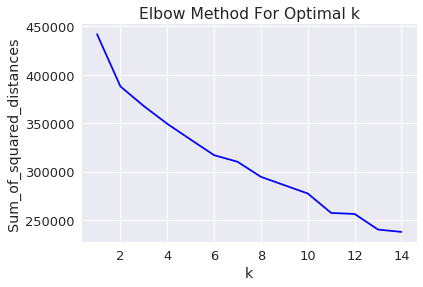

In [194]:
# number of clusters: from 4 to 8 
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [195]:
!pip install kneed

    100% |████████████████████████████████| 13.4MB 2.3MB/s eta 0:00:01  9% |███                             | 1.3MB 19.2MB/s eta 0:00:01    17% |█████▌                          | 2.3MB 22.1MB/s eta 0:00:01    56% |██████████████████              | 7.5MB 21.3MB/s eta 0:00:01    63% |████████████████████▍           | 8.5MB 21.7MB/s eta 0:00:01    71% |██████████████████████▊         | 9.5MB 20.9MB/s eta 0:00:01    94% |██████████████████████████████▎ | 12.7MB 23.3MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1


In [196]:
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [197]:

kl = KneeLocator(range(1, 15), Sum_of_squared_distances, curve="convex", direction="decreasing")

kl.elbow

6

# How many cluster i need if i use pca?

In [198]:
# starbucks_pca
Sum_of_squared_distances_pca = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(starbucks_pca)
    Sum_of_squared_distances_pca.append(km.inertia_)

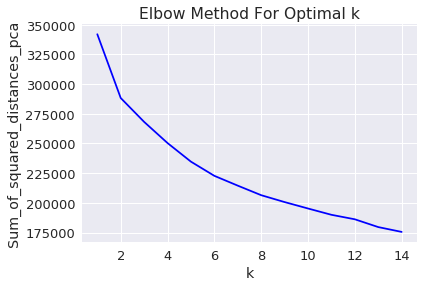

In [199]:
# number of clusters: from 4 to 8 also with pca
plt.plot(K, Sum_of_squared_distances_pca, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances_pca')
plt.title('Elbow Method For Optimal k')
plt.show()

In [200]:
# starbucks_pca
kl = KneeLocator(range(1, 15), Sum_of_squared_distances_pca, curve="convex", direction="decreasing")

kl.elbow

5

**5 its the elbow point**, where the SSE curve starts to bend. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters.

In [201]:

#range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 10, 15]
sum_of_squared_distances = []

for n_clusters in range(2, 11): # range_n_clusters:
    print("calculating {} clusters".format(n_clusters))
    # run k-means clustering on the data and...
    clusterer = KMeans(n_clusters=n_clusters, n_init=10).fit(X_pca)   
    print(f"{n_clusters}: silouhette score: {metrics.silhouette_score(X_pca, clusterer.labels_, metric='euclidean')}")
    # ... compute the average within-cluster distances.
    sum_of_squared_distances.append(clusterer.inertia_)
    print("sum of squared distances:", clusterer.inertia_)



calculating 2 clusters
2: silouhette score: 0.12339708559863583
sum of squared distances: 387901.833507
calculating 3 clusters
3: silouhette score: 0.10351287940147356
sum of squared distances: 367646.46192
calculating 4 clusters
4: silouhette score: 0.09628502872480524
sum of squared distances: 349355.188602
calculating 5 clusters
5: silouhette score: 0.10067453915893099
sum of squared distances: 333190.169777
calculating 6 clusters
6: silouhette score: 0.10092191800309096
sum of squared distances: 320796.359249
calculating 7 clusters
7: silouhette score: 0.12385957714123465
sum of squared distances: 303387.323156
calculating 8 clusters
8: silouhette score: 0.1240595505700178
sum of squared distances: 291798.859984
calculating 9 clusters
9: silouhette score: 0.1190539509570847
sum of squared distances: 281567.933642
calculating 10 clusters
10: silouhette score: 0.12484104032803335
sum of squared distances: 270456.454248


In [202]:
kmeans_kwargs = {
   ...:     "init": "random",
   ...:     "n_init": 10,
   ...:     "max_iter": 300,
   ...:     "random_state": 42,
   ...: }

silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_pca)
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_coefficients.append(score)

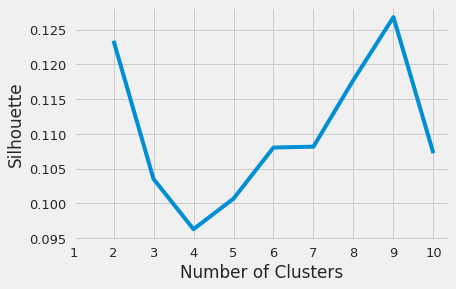

In [203]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette")
plt.show()

Based on the elbow criterion, the optimal number of clusters is five.
Based on the silhouette criterion, the optimal number of clusters is nine.

I used the elbow criterion 

In [204]:
 #Divide the above data into 5 clusters.
sc = StandardScaler()
use_offer_sc = sc.fit_transform(money_conv2)

kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit(use_offer_sc)
money_conv2["cluster"] = clusters.labels_
print(money_conv2["cluster"].unique())
money_conv2.head()

[2 0 1 3 4]


,inc__inc_30_50k,inc__inc_50_64K,inc__inc_64_80K,inc__inc_80_120K,gend__F,gend__M,gend__O,cust_age__young_20s,cust_age__adult_40s,cust_age__Midadult_60s,...,amount_total,time_mean,time_max,off_nuq,off_count,off_f1_sum,off_f2_sum,off_f3_sum,cv,cluster
cust_id,,,,,,,,,,,,,,,,,,,,,
68be06ca386d4c31939f3a4f0e3dd783,0,1,0,0,0,1,0,0,0,1,...,17.0,21.972222,29.00,4,12,5,5,2,0.40,2
0610b486422d4921ae7d2bf64640c50b,0,0,0,1,1,0,0,0,0,1,...,76.0,9.583333,22.00,2,3,2,0,1,0.50,0
38fe809add3b4fcf9315a9694bb96ff5,0,1,0,0,0,1,0,0,0,1,...,12.0,19.000000,29.00,2,4,2,2,0,0.00,2
78afa995795e4d85b5d9ceeca43f5fef,0,0,0,1,1,0,0,0,0,0,...,154.0,12.857143,22.25,4,11,4,4,3,0.75,0
a03223e636434f42ac4c3df47e8bac43,0,1,0,0,0,1,0,0,0,1,...,4.0,15.416667,25.50,3,8,5,3,0,0.00,2


In [205]:
money_conv3 = money_conv2.reset_index()

In [206]:
money_conv3.head(2)

,cust_id,inc__inc_30_50k,inc__inc_50_64K,inc__inc_64_80K,inc__inc_80_120K,gend__F,gend__M,gend__O,cust_age__young_20s,cust_age__adult_40s,...,amount_total,time_mean,time_max,off_nuq,off_count,off_f1_sum,off_f2_sum,off_f3_sum,cv,cluster
0,68be06ca386d4c31939f3a4f0e3dd783,0,1,0,0,0,1,0,0,0,...,17.0,21.972222,29.0,4,12,5,5,2,0.4,2
1,0610b486422d4921ae7d2bf64640c50b,0,0,0,1,1,0,0,0,0,...,76.0,9.583333,22.0,2,3,2,0,1,0.5,0


# union cluster with id customer to understand every cluster 

In [207]:
# union cluster with id customer to understand every cluster 
money_conv3 = money_conv3[['cluster', 'cust_id']]
money_conv3.head()

,cluster,cust_id
0,2,68be06ca386d4c31939f3a4f0e3dd783
1,0,0610b486422d4921ae7d2bf64640c50b
2,2,38fe809add3b4fcf9315a9694bb96ff5
3,0,78afa995795e4d85b5d9ceeca43f5fef
4,2,a03223e636434f42ac4c3df47e8bac43


In [208]:
profile_und =profile[['cust_id','cust_member_year','cust_age_range',
                      'cust_gender','cust_income_range']]

In [209]:
money_prof_cluster= profile_und.merge(money_conv3,how='right',on=['cust_id'])
print(money_prof_cluster.shape)
money_prof_cluster.head()

(16994, 6)


,cust_id,cust_member_year,cust_age_range,cust_gender,cust_income_range,cluster
0,68be06ca386d4c31939f3a4f0e3dd783,2017,Midadult_60s,M,inc_50_64K,2
1,0610b486422d4921ae7d2bf64640c50b,2017,Midadult_60s,F,inc_80_120K,0
2,38fe809add3b4fcf9315a9694bb96ff5,2018,Midadult_60s,M,inc_50_64K,2
3,78afa995795e4d85b5d9ceeca43f5fef,2017,Midold_80s,F,inc_80_120K,0
4,a03223e636434f42ac4c3df47e8bac43,2017,Midadult_60s,M,inc_50_64K,2


In [210]:
money_conv.head()

,cust_id,amount_mean,amount_total,time_mean,time_max,off_nuq,off_count,off_f1_sum,off_f2_sum,off_f3_sum,cv,_merge
0,0009655768c64bdeb2e877511632db8f,15.625000,125.0,22.62500,29.00,5,12,5,4,3,0.60,both
1,00116118485d4dfda04fdbaba9a87b5c,1.000000,3.0,17.00000,19.75,1,4,2,2,0,0.00,both
2,0011e0d4e6b944f998e987f904e8c1e5,15.400000,77.0,18.80000,27.25,5,13,5,5,3,0.60,both
3,0020c2b971eb4e9188eac86d93036a77,24.125000,193.0,14.53125,29.50,4,11,5,3,3,0.60,both
4,0020ccbbb6d84e358d3414a3ff76cffd,12.333333,148.0,15.62500,28.00,4,11,4,4,3,0.75,both


In [211]:
money_conv.isna().sum()

cust_id           0
amount_mean     422
amount_total    422
time_mean       422
time_max        422
off_nuq           0
off_count         0
off_f1_sum        0
off_f2_sum        0
off_f3_sum        0
cv                0
_merge            0
dtype: int64

In [212]:
money_conv.fillna({'amount_mean':0, 'amount_total':0,
                  'time_mean':0, 'time_max':0}, inplace=True)


In [213]:
money_convclu = money_conv[['cust_id', 'off_nuq', 'off_count', 
                            'off_f1_sum', 'off_f2_sum',
                            'off_f3_sum', 'cv']]
money_convclu.head()

,cust_id,off_nuq,off_count,off_f1_sum,off_f2_sum,off_f3_sum,cv
0,0009655768c64bdeb2e877511632db8f,5,12,5,4,3,0.60
1,00116118485d4dfda04fdbaba9a87b5c,1,4,2,2,0,0.00
2,0011e0d4e6b944f998e987f904e8c1e5,5,13,5,5,3,0.60
3,0020c2b971eb4e9188eac86d93036a77,4,11,5,3,3,0.60
4,0020ccbbb6d84e358d3414a3ff76cffd,4,11,4,4,3,0.75


In [214]:
money_prof__cv_clu= money_prof_cluster.merge(money_convclu,how='right',on=['cust_id'])
print(money_prof__cv_clu.shape)
money_prof__cv_clu.head()

(16994, 12)


,cust_id,cust_member_year,cust_age_range,cust_gender,cust_income_range,cluster,off_nuq,off_count,off_f1_sum,off_f2_sum,off_f3_sum,cv
0,68be06ca386d4c31939f3a4f0e3dd783,2017,Midadult_60s,M,inc_50_64K,2,4,12,5,5,2,0.40
1,0610b486422d4921ae7d2bf64640c50b,2017,Midadult_60s,F,inc_80_120K,0,2,3,2,0,1,0.50
2,38fe809add3b4fcf9315a9694bb96ff5,2018,Midadult_60s,M,inc_50_64K,2,2,4,2,2,0,0.00
3,78afa995795e4d85b5d9ceeca43f5fef,2017,Midold_80s,F,inc_80_120K,0,4,11,4,4,3,0.75
4,a03223e636434f42ac4c3df47e8bac43,2017,Midadult_60s,M,inc_50_64K,2,3,8,5,3,0,0.00


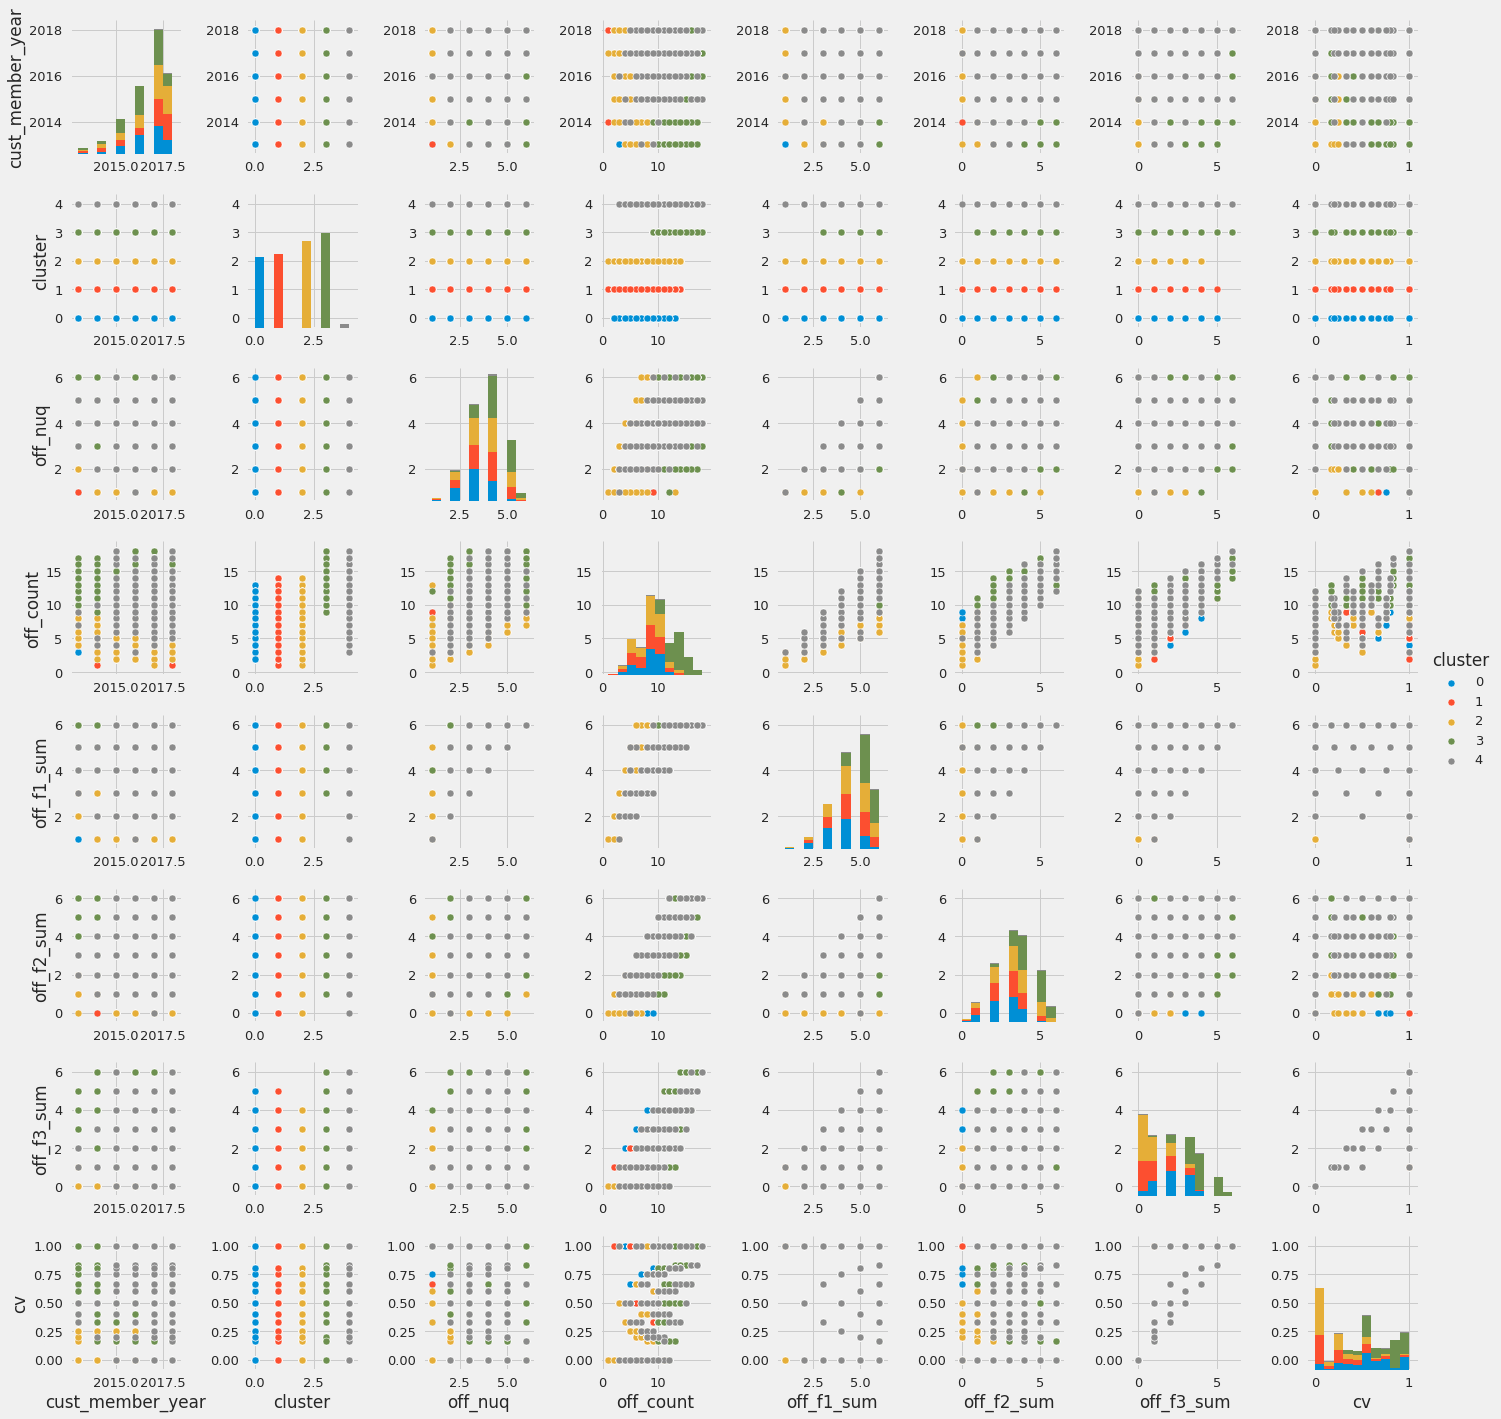

In [215]:
sns.pairplot(money_prof__cv_clu, hue='cluster')

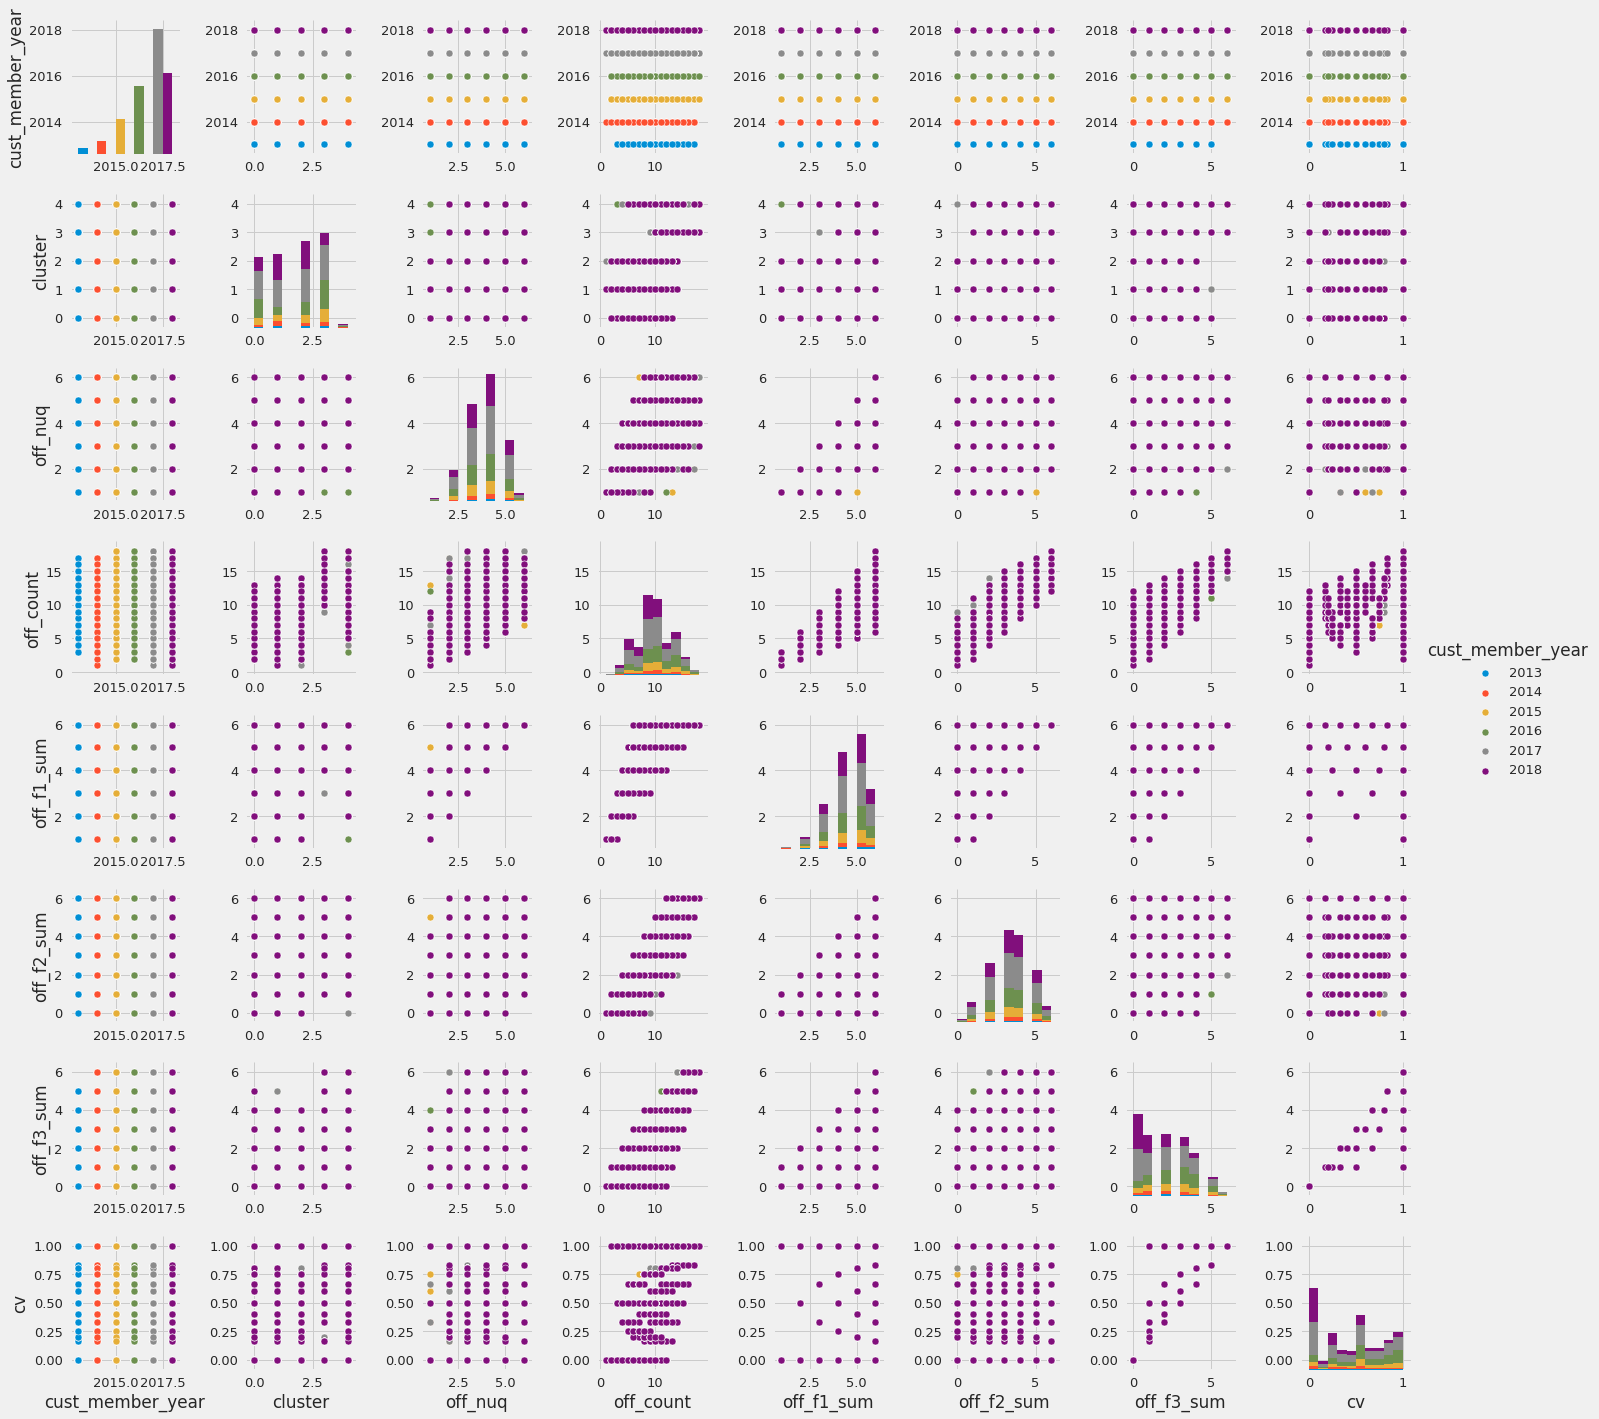

In [216]:
sns.pairplot(money_prof__cv_clu, hue='cust_member_year')

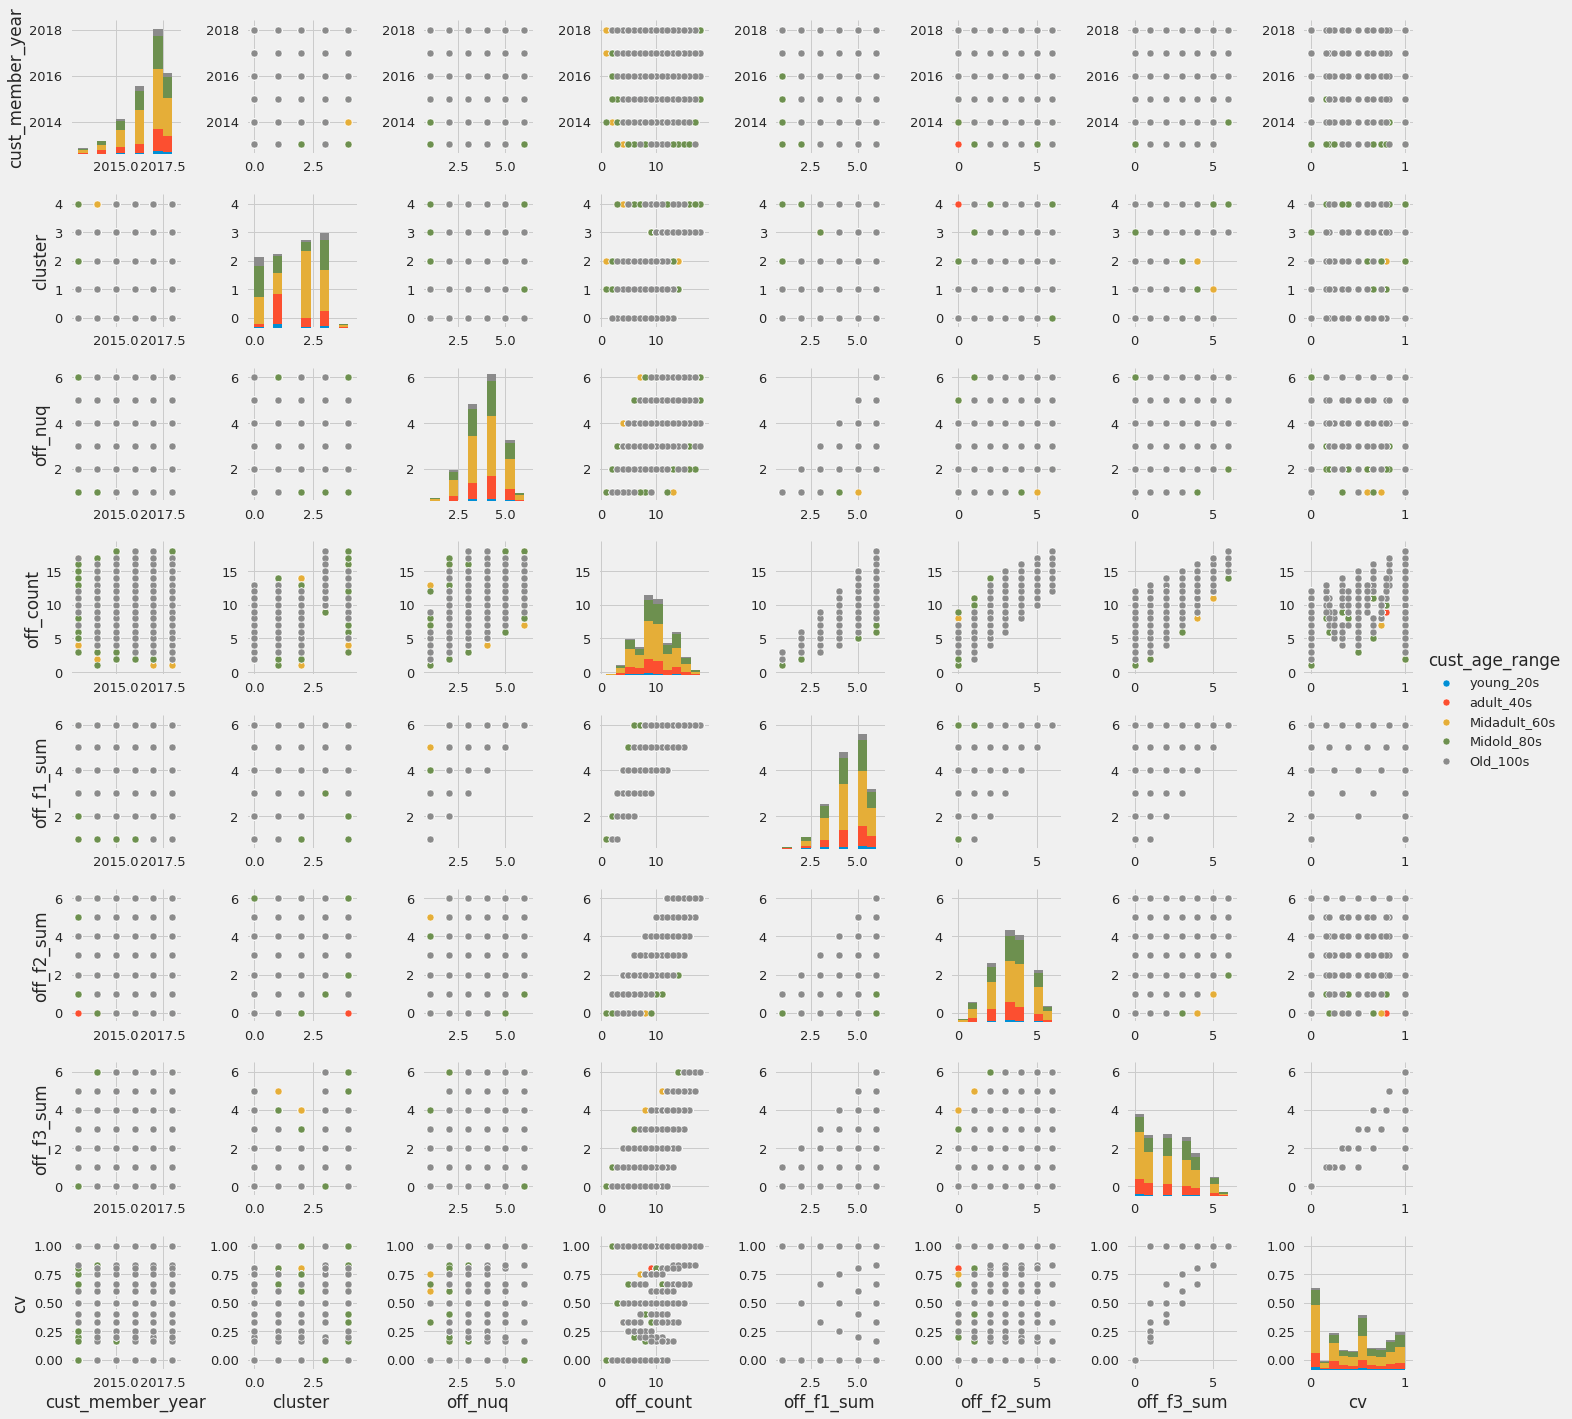

In [217]:
sns.pairplot(money_prof__cv_clu, hue='cust_age_range')

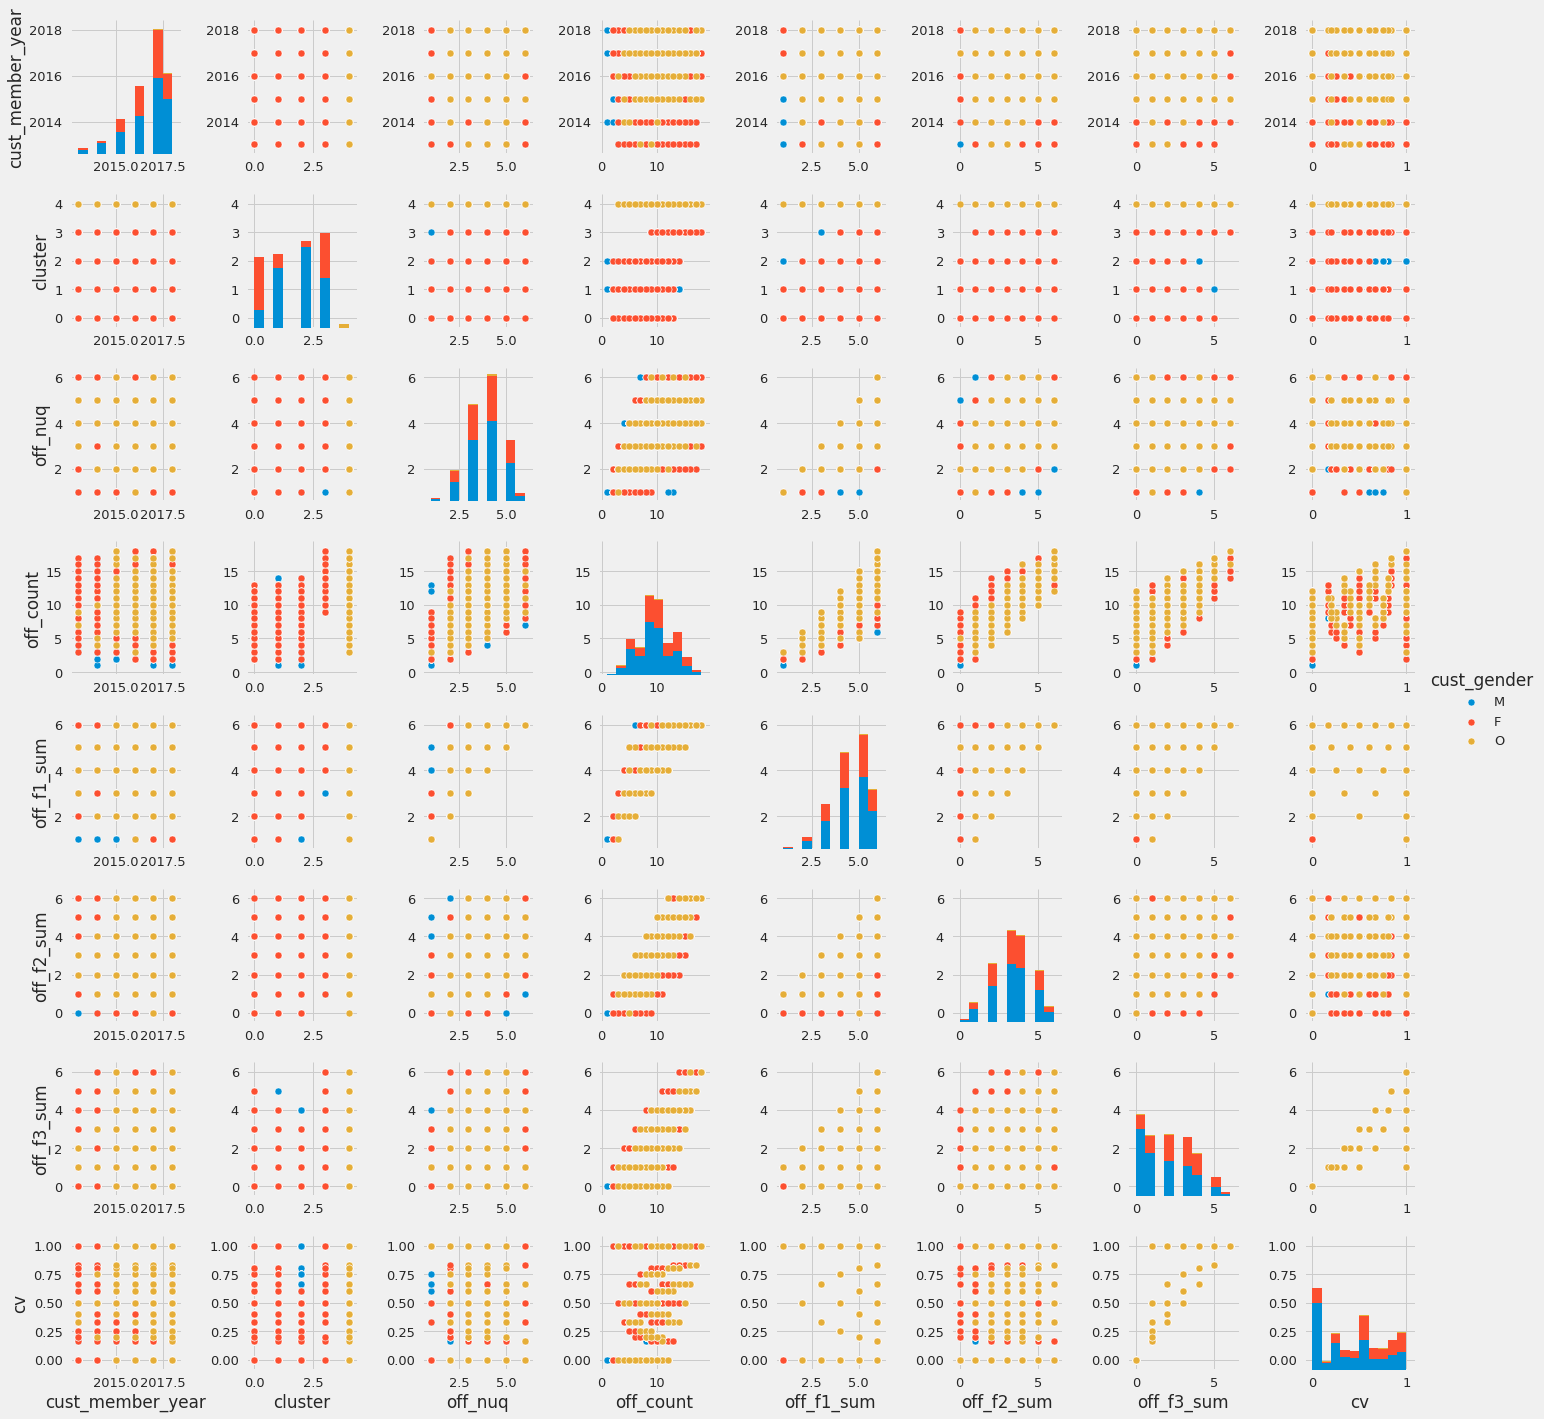

In [218]:
sns.pairplot(money_prof__cv_clu, hue='cust_gender')

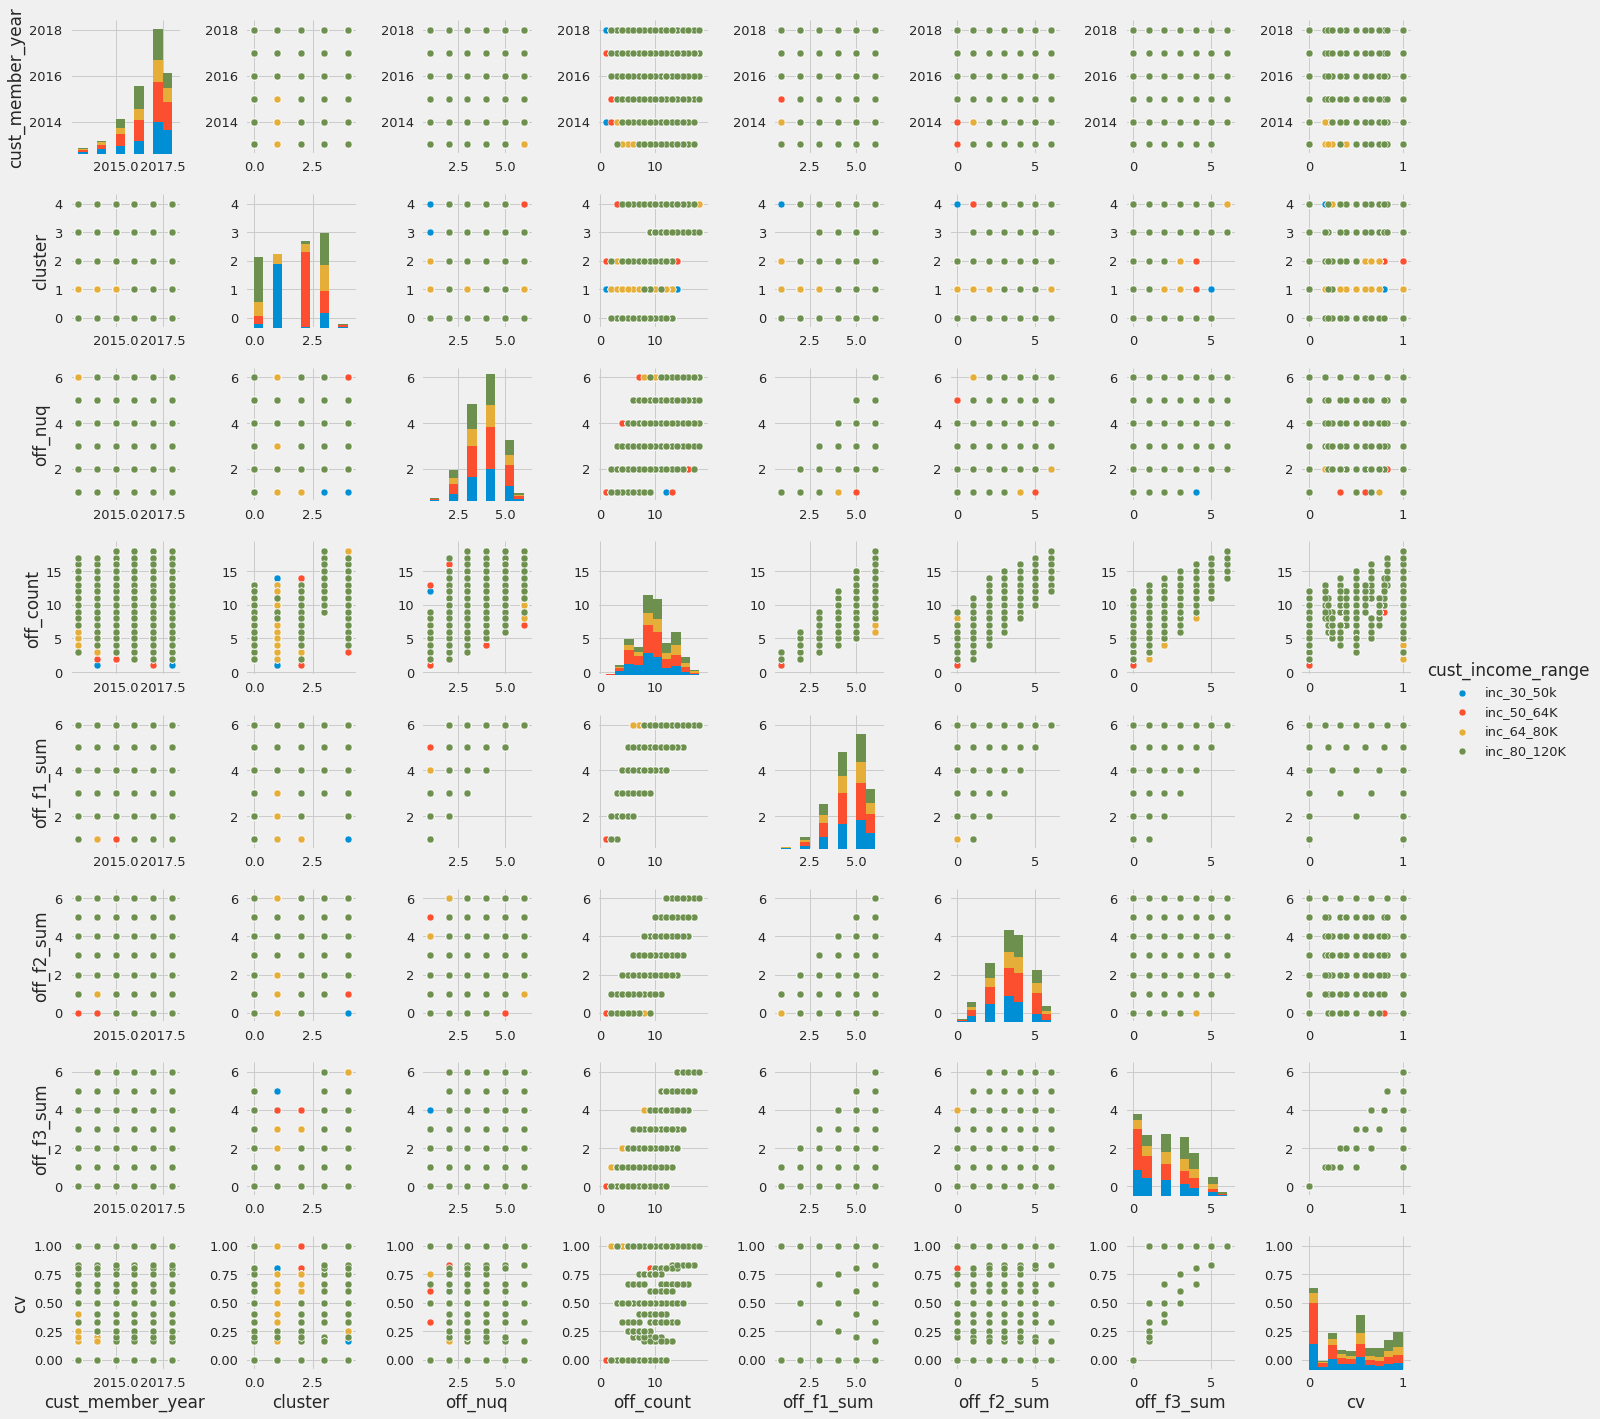

In [219]:
sns.pairplot(money_prof__cv_clu, hue='cust_income_range')

In [220]:
money_prof__cv_clu.columns

Index(['cust_id', 'cust_member_year', 'cust_age_range', 'cust_gender',
       'cust_income_range', 'cluster', 'off_nuq', 'off_count', 'off_f1_sum',
       'off_f2_sum', 'off_f3_sum', 'cv'],
      dtype='object')

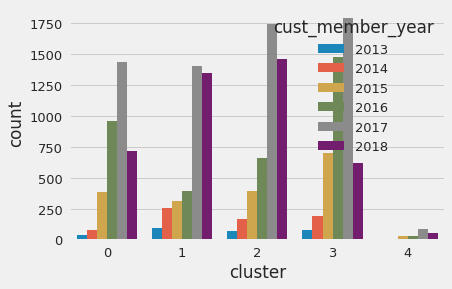

In [221]:
g = sns.countplot(x="cluster", hue="cust_member_year",
                data=money_prof__cv_clu);

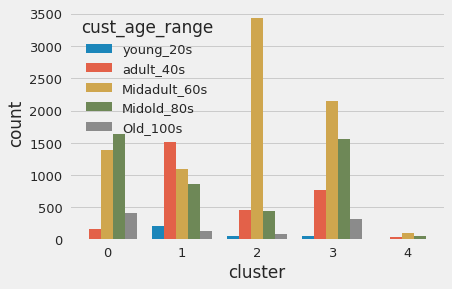

In [222]:
g = sns.countplot(x="cluster", hue="cust_age_range",
                data=money_prof__cv_clu);

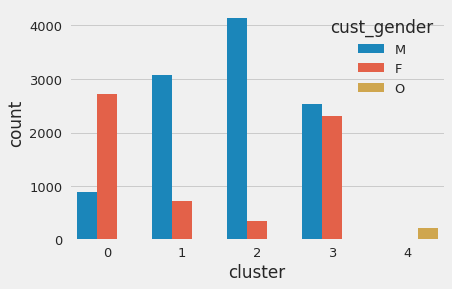

In [223]:
g = sns.countplot(x="cluster", hue="cust_gender",
                data=money_prof__cv_clu);

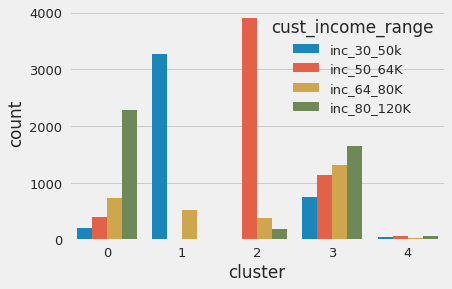

In [224]:
g = sns.countplot(x="cluster", hue="cust_income_range",
                data=money_prof__cv_clu);

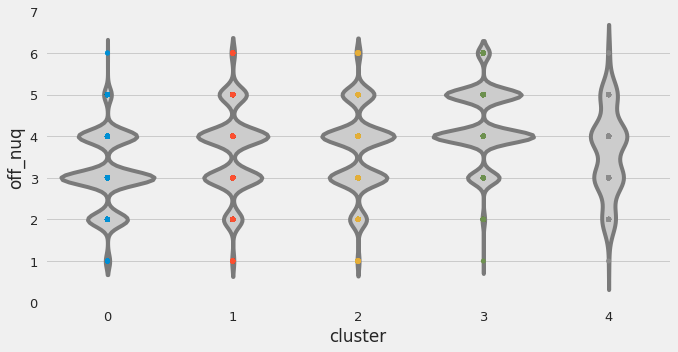

In [225]:
plt.figure(figsize=(10,5))
ax = sns.violinplot(x="cluster", y="off_nuq", data=money_prof__cv_clu,
                    inner=None, color=".8")
ax = sns.stripplot(x="cluster", y="off_nuq", data=money_prof__cv_clu)

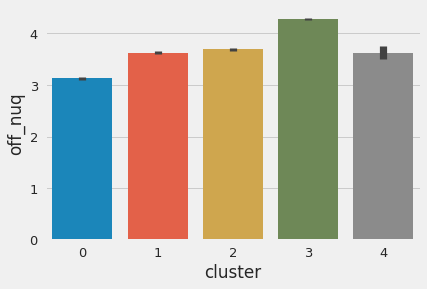

In [226]:

sns.barplot(x='cluster', y='off_nuq', data=money_prof__cv_clu)

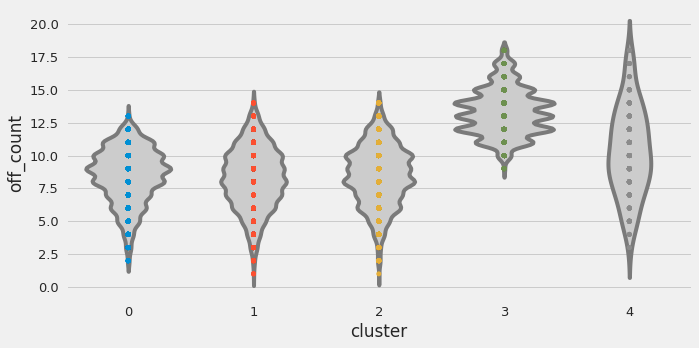

In [227]:
plt.figure(figsize=(10,5))
ax = sns.violinplot(x="cluster", y="off_count", data=money_prof__cv_clu,
                    inner=None, color=".8")
ax = sns.stripplot(x="cluster", y="off_count", data=money_prof__cv_clu)

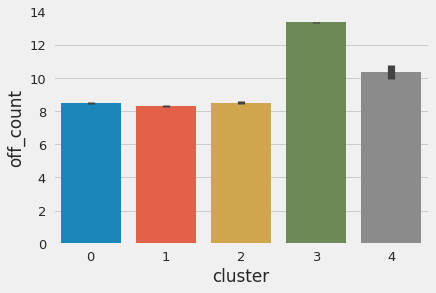

In [228]:

sns.barplot(x='cluster', y='off_count', data=money_prof__cv_clu)

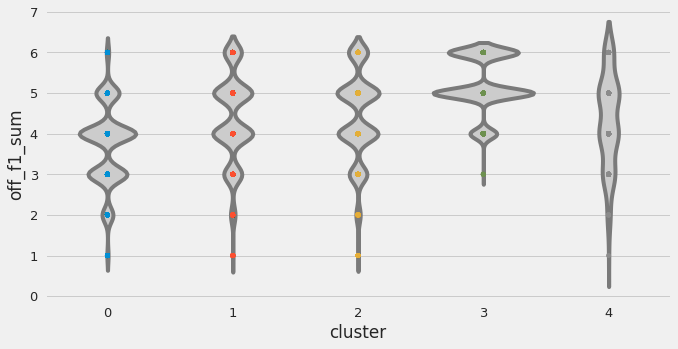

In [229]:
plt.figure(figsize=(10,5))
ax = sns.violinplot(x="cluster", y="off_f1_sum", data=money_prof__cv_clu,
                    inner=None, color=".8")
ax = sns.stripplot(x="cluster", y="off_f1_sum", data=money_prof__cv_clu)

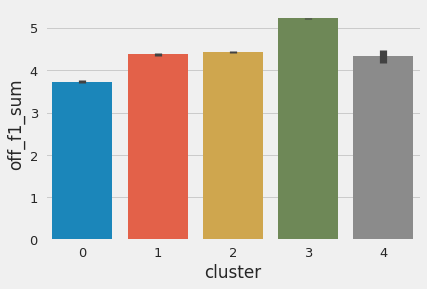

In [230]:

sns.barplot(x='cluster', y='off_f1_sum', data=money_prof__cv_clu)

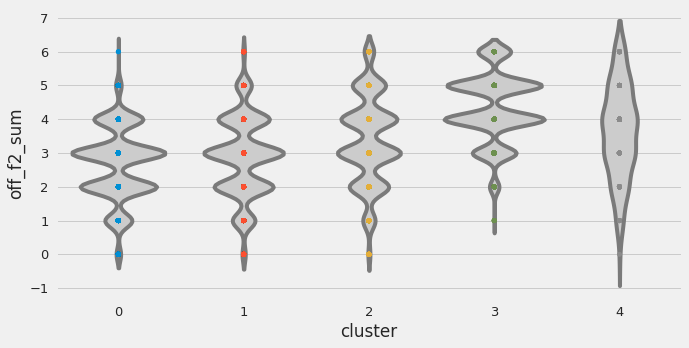

In [231]:
plt.figure(figsize=(10,5))
ax = sns.violinplot(x="cluster", y="off_f2_sum", data=money_prof__cv_clu,
                    inner=None, color=".8")
ax = sns.stripplot(x="cluster", y="off_f2_sum", data=money_prof__cv_clu)

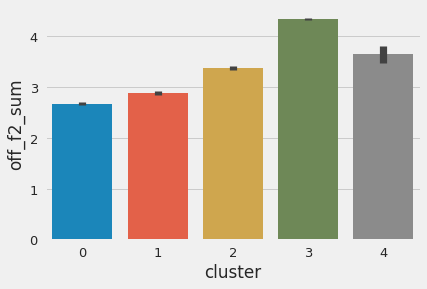

In [232]:

sns.barplot(x='cluster', y='off_f2_sum', data=money_prof__cv_clu)

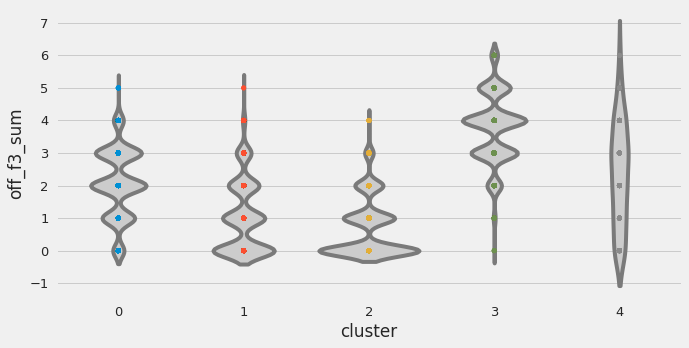

In [233]:
plt.figure(figsize=(10,5))
ax = sns.violinplot(x="cluster", y="off_f3_sum", data=money_prof__cv_clu,
                    inner=None, color=".8")
ax = sns.stripplot(x="cluster", y="off_f3_sum", data=money_prof__cv_clu)

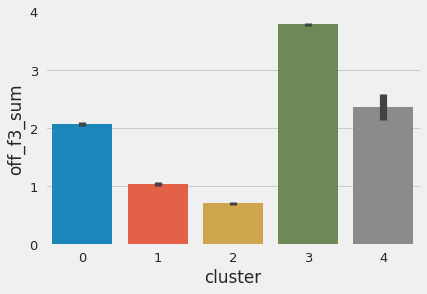

In [234]:

sns.barplot(x='cluster', y='off_f3_sum', data=money_prof__cv_clu)

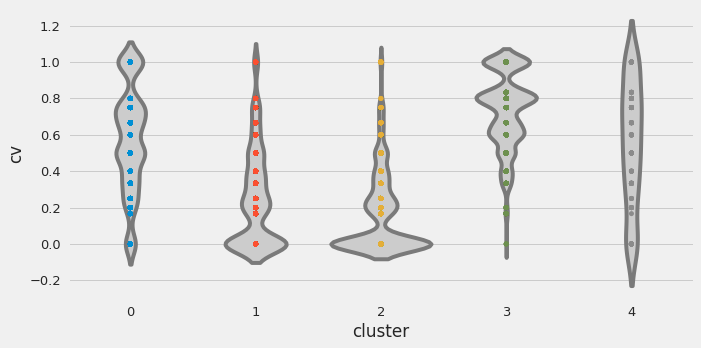

In [235]:
plt.figure(figsize=(10,5))
ax = sns.violinplot(x="cluster", y="cv", data=money_prof__cv_clu,
                    inner=None, color=".8")
ax = sns.stripplot(x="cluster", y="cv", data=money_prof__cv_clu)

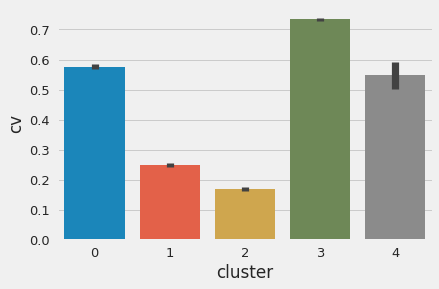

In [236]:

sns.barplot(x='cluster', y='cv', data=money_prof__cv_clu)

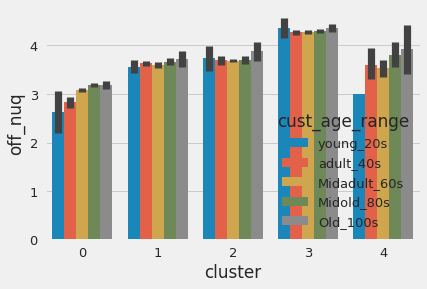

In [237]:

sns.barplot(x='cluster', y='off_nuq', hue='cust_age_range', data=money_prof__cv_clu)